# TVB-NEST: Bridging multiscale activity by co-simulation

## Step-by-step learn how to perform a co-simulation embedding spiking neural networks into large-scale brain networks using TVB.

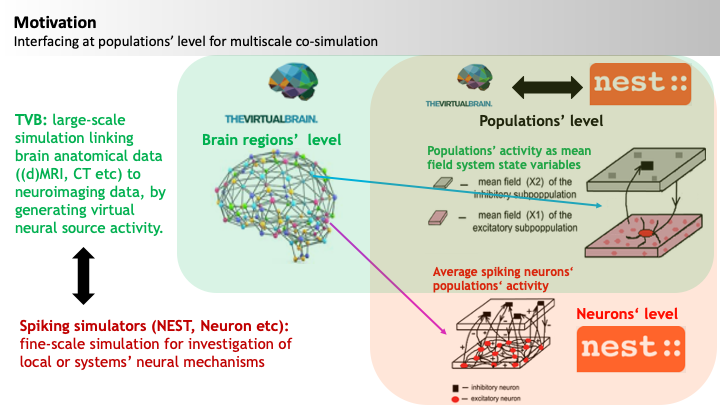

In [1]:
from IPython.display import Image, display
display(Image(filename='pics/ConceptGraph1.png',  width=1000, unconfined=False))

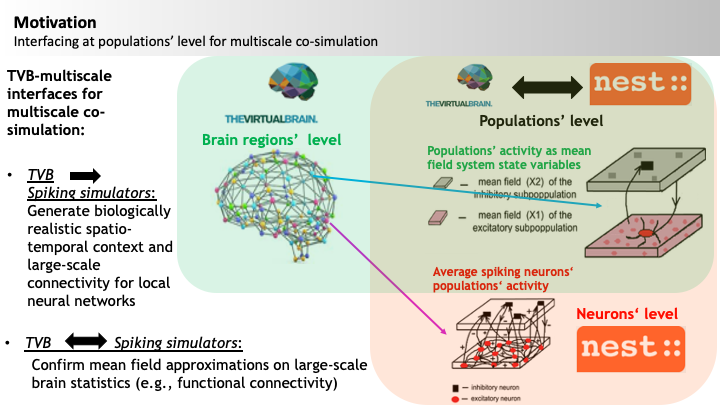

In [2]:
display(Image(filename='pics/ConceptGraph2.png',  width=1000, unconfined=False))

## tvb-multiscale toolbox:

### https://github.com/the-virtual-brain/tvb-multiscale

For questions use the git issue tracker, or write an e-mail to me: dionysios.perdikis@charite.de

# TVB - NEST co-simulation 

## Wilson - Cowan TVB mean field model

For every region node $n\prime$ modelled as a mean-field node in TVB:

Population activity dynamics (1 excitatory and 1 inhibitory population):

 $\dot{E}_k = \dfrac{1}{\tau_e} (-E_k  + (k_e - r_e E_k) \mathcal{S}_e (\alpha_e \left( c_{ee} E_k - c_{ei} I_k  + P_k - \theta_e + \mathbf{\Gamma}(E_k, E_j, u_{kj}) + W_{\zeta}\cdot E_j + W_{\zeta}\cdot I_j\right) )) $
 
$
            \dot{I}_k = \dfrac{1}{\tau_i} (-I_k  + (k_i - r_i I_k) \mathcal{S}_i (\alpha_i \left( c_{ie} E_k - c_{ee} I_k  + Q_k - \theta_i + \mathbf{\Gamma}(E_k, E_j, u_{kj}) + W_{\zeta}\cdot E_j + W_{\zeta}\cdot I_j\right) ))$


## Spiking network model in NEST

using "iaf_cond_alpha" spiking neuronal model.

## TVB to NEST coupling
TVB couples to NEST via instantaneous spike rate $ w_{TVB->NEST} * E(t) $, 

Inhomogeneous spike generator NEST devices are used as TVB "proxy" nodes and generate independent Poisson-random spike trains 

$ \left[ \sum_k \delta(t-\tau_{n\prime n}-{t_j}^k) \right]_{j \in n\prime} $

Alternatively, the spike trains are generated outside NEST using the Elephant software and inserted to NEST via spike generator devices.



## NEST to TVB update

A NEST spike detector device is used to count spike for each time step, and convert it to an instantaneous population mean rate that overrides

$ {E_{_{n}}}(t) =  \frac{\sum_j\left[ \sum_k \delta(t-\tau_n-{t_j}^k) \right]_{j \in E_n}}{N_E * dt} $ 

$ {I_{_{n}}}(t) =  \frac{\sum_j\left[ \sum_k \delta(t-\tau_n-{t_j}^k) \right]_{j \in I_n}}{N_I * dt} $

in  spikes/sec.

This update process concerns only the TVB region nodes that are simulated exclusively in NEST, as spiking networks. All the rest of TVB nodes will follow the equations of the mean field model described above.


## Simulator loop

### Simulating several (i.e., minimally 2) NEST time steps for every 1 TVB time step for stable integration

### Synchronizaion every minimum delay time between the two simulators.

# WORKFLOW:

In [3]:
from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_multiscale.tvb_nest.config import Config
from examples.parallel.wilson_cowan.config import configure

config = configure(config_class=Config)

# Select here which kind of test Co-Simulation to perform,
# - with Tsync = min_tvb_delay, or
# - with Tsync = min_tvb_delay / 2:
config.TVB_MIN_IDELAY_TO_SYNC_N_STEP_RATIO = 2

# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

2023-09-07 16:04:27,094 - INFO - tvb_multiscale.tvb_nest.config - Configuring NEST path...
2023-09-07 16:04:27,094 - INFO - tvb_multiscale.tvb_nest.config - Configuring NEST path...
2023-09-07 16:04:27,121 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2023-09-07 16:04:27,121 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2023-09-07 16:04:27,128 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2023-09-07 16:04:27,128 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2023-09-07 16:04:27,136 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2023-09-07 16:04:27,136 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2023-09-07 16:04:27,143 - INFO - tvb_multiscale.tvb_ne

Config (
  title .................................... 'Config gid: 37b93e0b-1ff4-4040-a887-b28128e823bc'
  Type ..................................... 'Config'
  gid ...................................... UUID('37b93e0b-1ff4-4040-a887-b28128e823bc')
  config.gid ............................... UUID('37b93e0b-1ff4-4040-a887-b28128e823bc')
  config.title ............................. 'Config gid: 37b93e0b-1ff4-4040-a887-b28128e823bc'
  config.log ............................... <Logger tvb_multiscale.tvb_nest.config (DEBUG)>
  config.VERBOSITY ......................... 1
  config.BASEPATH .......................... '/home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/examples_data/WilsonCowanNoSpikeNetBuilders'
  config.out ............................... OutputConfig gid: 9c3bf360-c0bc-4304-a89c-3534d0f895ea
  config.figures ........................... FiguresConfig
  config.DEFAULT_SUBJECT[connectivity] ..... Connectivity gid: 5b35874e-4600-4be5-8437-b16c35331d22
  config.D

## BACKEND: 1. Load structural data <br> (minimally a TVB connectivity)  <br> & prepare TVB simulator  <br> (region mean field model, integrator, monitors etc)

In [4]:
# This would run on TVB only before creating any multiscale cosimulation interface connections.
from examples.parallel.tvb_nest.wilson_cowan.tvb_config import build_tvb_simulator

simulator = build_tvb_simulator(config=config, config_class=Config)


2023-09-07 16:04:32,909 - ERROR - tvb_multiscale.core.tvb.cosimulator.cosimulator_parallel - Bad Simulator.integrator.noise.nsig shape: (2, 1, 1)
CoSimulatorParallel (
  title ............................... 'CoSimulatorParallel gid: c7e8eebe-4533-4b40-aaab-c955966e02bd'
  Type ................................ 'CoSimulatorParallel'
  min_idelay_synch_n_step_ratio ....... 2
  model ............................... WilsonCowan gid: c60c433a-5a6c-4249-a1d0-43405c47a934
  output_interfaces ................... None
  input_interfaces .................... None
  out_proxy_inds ...................... --------------------
  shape ............................... (0,)
  dtype ............................... int64
  is empty ............................ True
  relative_output_interfaces_time_steps  0
  exclusive ........................... False
  voi ................................. --------------------
  proxy_inds .......................... --------------------
  synchronization_time .........

## BACKEND: 2. Build and connect the NEST network model <br> (networks of spiking neural populations for fine-scale <br>regions, stimulation devices, spike detectors etc)

In [5]:
# This would run on NEST only before creating any multiscale cosimulation interface connections.
# Here it is assumed that the TVB simulator is already created and we can get some of its attributes, 
# either by directly accessing it, or via serialization.

from examples.parallel.tvb_nest.wilson_cowan.nest_config import build_nest_network


# nest_network = build_nest_network(config=config, config_class=Config)


## FRONTEND: 3. Build the TVB-NEST interface

In [6]:

# options for a nonopinionated builder:
from tvb_multiscale.core.interfaces.base.transformers.models.models import Transformers
from tvb_multiscale.core.interfaces.base.transformers.builders import \
        DefaultTVBtoSpikeNetTransformers, DefaultSpikeNetToTVBTransformers, \
        DefaultTVBtoSpikeNetModels, DefaultSpikeNetToTVBModels
from tvb_multiscale.tvb_nest.interfaces.builders import \
        TVBtoNESTModels, NESTInputProxyModels, DefaultTVBtoNESTModels, \
        NESTtoTVBModels, NESTOutputProxyModels, DefaultNESTtoTVBModels

    
    
def print_enum(enum):
    print("\n", enum)
    for name, member in enum.__members__.items():
        print(name,"= ", member.value)
    
    
print("Available input (NEST->TVB update) / output (TVB->NEST coupling) interface models:")
print_enum(TVBtoNESTModels)
print_enum(NESTtoTVBModels)
    
    
print("\n\nAvailable input (spikeNet->TVB update) / output (TVB->spikeNet coupling) transformer models:")

print_enum(DefaultTVBtoSpikeNetModels)
print_enum(DefaultTVBtoSpikeNetTransformers)
    
print_enum(DefaultSpikeNetToTVBModels)
print_enum(DefaultSpikeNetToTVBTransformers)    
    
    
print("\n\nAvailable input (NEST->TVB update) / output (TVB->NEST coupling) proxy models:")

print_enum(DefaultTVBtoNESTModels)
print_enum(NESTInputProxyModels)
    
print_enum(NESTOutputProxyModels)
print_enum(DefaultNESTtoTVBModels)
    
print("\n\nAll basic transformer models:")
print_enum(Transformers)
    



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: HEAD@c545255f7
 Built: May 18 2022 09:50:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

Available input (NEST->TVB update) / output (TVB->NEST coupling) interface models:

 <enum 'TVBtoSpikeNetModels'>
RATE =  0
SPIKES =  1
CURRENT =  2

 <enum 'SpikeNetToTVBModels'>
SPIKES =  0
VOLTAGE =  1


Available input (spikeNet->TVB update) / output (TVB->spikeNet coupling) transformer models:

 <enum 'DefaultTVBtoSpikeNetModels'>
RATE =  RATE
SPIKES =  SPIKES_SINGLE_INTERACTION
CURRENT =  CURRENT

 <enum 'DefaultTVBtoSpikeNetTransformers'>
RATE =  <class 'tvb_multiscale.core.interfaces.base.transformers.models.base.LinearRate'>
SPIKES =  <class 'tvb_multiscale.core.interfaces.base.transformers.models.elephant.RatesToSpikesElephantPoisson'>
SPIKES_

In [7]:
from examples.parallel.tvb_nest.wilson_cowan.tvb_interface_config import configure_TVB_interfaces
from examples.parallel.tvb_nest.wilson_cowan.nest_interface_config import configure_NEST_interfaces
from examples.parallel.tvb_nest.wilson_cowan.transformers_config import \
    configure_TVBtoNEST_transformer_interfaces, configure_NESTtoTVB_transformer_interfaces

tvb_interface_builder = configure_TVB_interfaces(simulator=simulator, config=config, config_class=Config)

nest_interface_builder = configure_NEST_interfaces(config=config, config_class=Config)

tvb_to_nest_interface_builder = configure_TVBtoNEST_transformer_interfaces(config=config, config_class=Config)

nest_to_tvb_interface_builder = configure_NESTtoTVB_transformer_interfaces(config=config, config_class=Config)



output (TVB-> coupling) interfaces' configurations:

[{'voi': array(['E'], dtype='<U1'), 'coupling_mode': 'TVB', 'proxy_inds': array([0, 1])}]

input (TVB<- update) interfaces' configurations:

[{'voi': array(['E'], dtype='<U1'), 'proxy_inds': array([0, 1])}, {'voi': array(['I'], dtype='<U1'), 'proxy_inds': array([0, 1])}]

input (spikeNet <- coupling) interfaces' configurations:

[{'populations': array(['E'], dtype='<U1'), 'coupling_mode': 'TVB', 'proxy_inds': array([0, 1]), 'proxy_model': 'RATE', 'spiking_proxy_inds': array([0, 1])}]

output (spikeNet -> update) interfaces' configurations:

[{'populations': array(['E'], dtype='<U1'), 'proxy_inds': array([0, 1]), 'proxy_model': 'SPIKES_MEAN'}, {'populations': array(['I'], dtype='<U1'), 'proxy_inds': array([0, 1]), 'proxy_model': 'SPIKES_MEAN'}]

output (->Transformer-> coupling) interfaces' configurations:

[{'transformer_model': 'RATE', 'transformer_params': {'scale_factor': array([250000.])}}]

input (TVB<-...-Transformer<-...-spik

## BACKEND:
### - Build TVB and Spiking Network models and simulators
### - Build interfaces
### - Configure co-simulation

In [8]:
from tvb_multiscale.core.nrp.init.tvb import tvb_init


tvb_app = tvb_init(config, tvb_cosimulator_builder=build_tvb_simulator)




Starting App NRPTVBApp...

Setting TVB LIBRARY_PROFILE...

Building with App NRPTVBApp...

Building interfaces' with builder TVBInterfaceBuilder of App NRPTVBApp...

Building TVB CoSimulator with builder script build_tvb_simulator of App NRPTVBApp...
2023-09-07 16:04:35,993 - ERROR - tvb_multiscale.core.tvb.cosimulator.cosimulator_parallel - Bad Simulator.integrator.noise.nsig shape: (2, 1, 1)
CoSimulatorParallel (
  title ............................... 'CoSimulatorParallel gid: 6396f790-e0e1-4c69-bd48-557eb438c2ad'
  Type ................................ 'CoSimulatorParallel'
  min_idelay_synch_n_step_ratio ....... 2
  model ............................... WilsonCowan gid: f90bd773-dfae-4b85-80e0-a92232fd8a8b
  output_interfaces ................... None
  input_interfaces .................... None
  out_proxy_inds ...................... --------------------
  shape ............................... (0,)
  dtype ............................... int64
  is empty .........................

Failed to summarize: 
monitors
tuple
'NoneType' object has no attribute 'tolist'

CoSimulatorParallel (
  title ............................... 'CoSimulatorParallel gid: 6396f790-e0e1-4c69-bd48-557eb438c2ad'
  Type ................................ 'CoSimulatorParallel'
  min_idelay_synch_n_step_ratio ....... 2
  model ............................... WilsonCowan gid: f90bd773-dfae-4b85-80e0-a92232fd8a8b
  output_interfaces ................... TVBOutputInterfaces gid: 79d579d9-4eed-4f55-a4d9-bc84edff602a
  input_interfaces .................... TVBInputInterfaces gid: 30a889bb-5abf-4e88-aaba-d10df56cf478
  out_proxy_inds ...................... --------------------
  out_proxy_inds: shape ............... (2,)
  out_proxy_inds: dtype ............... int64
  out_proxy_inds: values .............. [[0, 1]]
  relative_output_interfaces_time_steps  0
  exclusive ........................... True
  voi ................................. --------------------
  voi: shape .......................... (

In [9]:
from tvb_multiscale.core.nrp.init.spikeNet import nest_init

spikeNet_app = nest_init(config, spiking_network_builder=build_nest_network)




Starting App NESTNRPApp...

Building with App NESTNRPApp...

Building Spiking Network with builder script build_nest_network of App NESTNRPApp...
Building NESTNetwork...
2023-09-07 16:04:36,787 - INFO - tvb_multiscale.core.spiking_models.network - <class 'tvb_multiscale.tvb_nest.nest_models.network.NESTNetwork'> created!
2023-09-07 16:04:36,787 - INFO - tvb_multiscale.core.spiking_models.network - <class 'tvb_multiscale.tvb_nest.nest_models.network.NESTNetwork'> created!

...created: OrderedDict([('title', "'NESTPopulation gid: 102843ee-0a5e-4b88-85fa-9df4bf7c0a39'"), ('Type', "'NESTPopulation'"), ('_nodes', 'NodeCollection(metadata=None, model=iaf_cond_alpha, size=100, first=1, last=100)'), ('label', "'E'"), ('model', "'NESTPopulation'"), ('brain_region', "'bankssts_L'"), ('gid', "UUID('102843ee-0a5e-4b88-85fa-9df4bf7c0a39')"), ('number_of_nodes', '100'), ('nodes', 'NodeCollection(metadata=None, model=iaf_cond_alpha, size=100, first=1, last=100)')])...

...created: OrderedDict([('tit

2023-09-07 16:05:07,467 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_recorder for ['E']-> created!
2023-09-07 16:05:07,524 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_recorder for ['I']-> created!
2023-09-07 16:05:07,524 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_recorder for ['I']-> created!
2023-09-07 16:05:07,577 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ->['E'] created!
2023-09-07 16:05:07,577 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ->['E'] created!

NESTInputInterfaces (
  title .....

In [10]:
from tvb_multiscale.core.nrp.init.transformers import tvb_to_spikeNet_transformer_init, spikeNet_to_tvb_transformer_init


tvb_to_spikeNet_app = tvb_to_spikeNet_transformer_init(config)

spikeNet_to_tvb_app = spikeNet_to_tvb_transformer_init(config)


Starting App NRPTVBtoSpikeNetTransformerApp...

Building with App NRPTVBtoSpikeNetTransformerApp...

Building interfaces' with builder TVBtoSpikeNetTransformerInterfaceBuilder of App NRPTVBtoSpikeNetTransformerApp...

Instantiating interfaces' builder TVBtoSpikeNetTransformerInterfaceBuilder of App NRPTVBtoSpikeNetTransformerApp...

Configuring interfaces' builder TVBtoSpikeNetTransformerInterfaceBuilder of App NRPTVBtoSpikeNetTransformerApp...

Reading interfaces' configurations from files...
loading all interfaces

TVBtoSpikeNetTransformerInterfaces (
  title ................... 'TVBtoSpikeNetTransformerInterfaces gid: af96d0e1-aca9-491e-94b0-d10a575596a6'
  Type .................... 'TVBtoSpikeNetTransformerInterfaces'
  interfaces[0] ........... '--------------------'
  interfaces[0].title ..... 'TVBtoSpikeNetTransformerInterface gid: 80c1ae23-005a-46cc-a2c8-f44230440939'
  interfaces[0].Type ...... 'TVBtoSpikeNetTransformerInterface'
  interfaces[0].transformer  LinearRate gid: 8

## 4. Simulate, gather results

In [11]:
from tvb_multiscale.core.nrp.run import *


def run_for_synchronization_time_sync_min_delay(
    tvb_app, spikeNet_app, tvb_to_spikeNet_app, spikeNet_to_tvb_app,
    tvb_to_trans_cosim_updates=None, trans_to_spikeNet_cosim_updates=None,
    spikeNet_to_trans_cosim_updates=None,  trans_to_tvb_cosim_updates=None):
    """Function for cosimulating for one loop of synchronization time.
       It could be the highest level possible ENTRYPOINT for a parallel cosimulation.
       In that case, the cosimulation manager would be completely agnostic
       - of what the Apps of the different processed do,
       - including the transformation function they employ.
       The ENTRYPOINT here is just the cosimulation updates' data,
       which are "thrown over the wall" for the necessary data exchanges.
       Co-Simulator and bidirectional Transformers have to alternate between them, 
       and can be parallelized within (CoSimulator and Transformers respectively).
    """
    # Transform TVB -> SpikeNet couplings of times [t, t + Tsync] = [t, t + min_tvb_delay]...
    if tvb_to_trans_cosim_updates is not None:
        # ...if any:
        trans_to_spikeNet_cosim_updates = run_transformer(tvb_to_spikeNet_app, tvb_to_trans_cosim_updates)
    else:
        trans_to_spikeNet_cosim_updates = None
    # Transform SpikeNet -> TVB updates of times [t - Tsync, t] = [t - min_tvb_delay, t]...
    if spikeNet_to_trans_cosim_updates is not None:
        # ...if any:
        trans_to_tvb_cosim_updates = run_transformer(spikeNet_to_tvb_app, spikeNet_to_trans_cosim_updates)
    else:
        trans_to_tvb_cosim_updates = None
    # TVB t -> t + Tsync
    # Simulate TVB for times [t, t + Tsync] = [t, t + min_tvb_delay]
    # with or without spikeNet update inputs of times [t - Tsync, t] = [t - min_tvb_delay, t]
    tvb_to_trans_cosim_updates = run_tvb(tvb_app, trans_to_tvb_cosim_updates)
    # SpikeNet t -> t + Tsync
    # Simulate SpikeNet for times [t, t + Tsync] = [t, t + min_tvb_delay]
    # with or without TVB coupling inputs of times [t, t + min_tvb_delay]
    spikeNet_to_trans_cosim_updates = run_spikeNet(spikeNet_app, trans_to_spikeNet_cosim_updates)
    return tvb_to_trans_cosim_updates, trans_to_spikeNet_cosim_updates, \
           spikeNet_to_trans_cosim_updates, trans_to_tvb_cosim_updates


def run_for_synchronization_time_sync_min_delay2(
    tvb_app, spikeNet_app, tvb_to_spikeNet_app, spikeNet_to_tvb_app,
    tvb_to_trans_cosim_updates=None, trans_to_spikeNet_cosim_updates=None,
    spikeNet_to_trans_cosim_updates=None,  trans_to_tvb_cosim_updates=None):
    """Function for cosimulating for one loop of synchronization time.
       It could be the highest level possible ENTRYPOINT for a parallel cosimulation.
       In that case, the cosimulation manager would be completely agnostic
       - of what the Apps of the different processed do,
       - including the transformation function they employ.
       The ENTRYPOINT here is just the cosimulation updates' data,
       which are "thrown over the wall" for the necessary data exchanges.
       All processes can work in parallel, 
       since the transformers work on time intervals than those simulated by the cosimulators.
    """
    # TVB t -> t + Tsync
    # Simulate TVB for times [t, t + Tsync] = [t, t + min_tvb_delay/2]
    # with or without spikeNet update inputs of times [t - Tsync, t] = [t - min_tvb_delay/2, t]
    tvb_to_trans_cosim_updates = run_tvb(tvb_app, trans_to_tvb_cosim_updates)
    # SpikeNet t -> t + Tsync
    # Simulate SpikeNet for times [t, t + Tsync] = [t, t + min_tvb_delay/2]
    # with or without TVB coupling inputs of times [t + min_tvb_delay/2, t + min_tvb_delay]
    spikeNet_to_trans_cosim_updates = run_spikeNet(spikeNet_app, trans_to_spikeNet_cosim_updates)
    # Transform TVB -> SpikeNet couplings of times [t + Tsync, t + 2*Tsync]=[t + Tsync, t + min_tvb_delay]...
    if tvb_to_trans_cosim_updates is not None:
        # ...if any:
        trans_to_spikeNet_cosim_updates = run_transformer(tvb_to_spikeNet_app, tvb_to_trans_cosim_updates)
    else:
        trans_to_spikeNet_cosim_updates = None
    # Transform SpikeNet -> TVB updates of times [t, t + Tsync] = [t, t + min_tvb_delay/2]...
    if spikeNet_to_trans_cosim_updates is not None:
        # ...if any:
        trans_to_tvb_cosim_updates = run_transformer(spikeNet_to_tvb_app, spikeNet_to_trans_cosim_updates)
    else:
        trans_to_tvb_cosim_updates = None
    return tvb_to_trans_cosim_updates, trans_to_spikeNet_cosim_updates, \
           spikeNet_to_trans_cosim_updates, trans_to_tvb_cosim_updates



def run_cosimulation(tvb_app, spikeNet_app, tvb_to_spikeNet_app, spikeNet_to_tvb_app,
                     advance_simulation_for_delayed_monitors_output=True):
    """Function for running the whole cosimulation, assuming all Apps are built and configured.
       This function shows the necessary initialization of the cosimulation.
    """

    import time
    import numpy as np

    # Keep the following cosimulation attributes safe and easy to access:
    simulation_length = tvb_app.cosimulator.simulation_length 
    synchronization_time = tvb_app.cosimulator.synchronization_time
    synchronization_n_step = tvb_app.cosimulator.synchronization_n_step  # store the configured value
    if advance_simulation_for_delayed_monitors_output:
        simulation_length += synchronization_time
    dt = tvb_app.cosimulator.integrator.dt
    
    # Initial conditions of co-simulation:
    # Steps left to simulate:
    remaining_steps = int(np.round(simulation_length / dt))
    # Steps already simulated:
    simulated_steps = 0
    # TVB initial condition cosimulation coupling towards SpikeNet for 0...Tsync:
    tvb_to_trans_cosim_updates = tvb_app.get_tvb_init_cosim_coupling(relative_output_interfaces_time_steps=0)
    if tvb_app.cosimulator.min_idelay_sync_n_step_ratio == 2:
        run_for_synchronization_time = run_for_synchronization_time_sync_min_delay2
        # Transform the initial condition for [0, Tsync] = [0 min_tvb_delay/2] from TVB to spikeNet:
        if tvb_to_trans_cosim_updates is not None:
            # ...if any:
            trans_to_spikeNet_cosim_updates = run_transformer(tvb_to_spikeNet_app, tvb_to_trans_cosim_updates)
        else:
            trans_to_spikeNet_cosim_updates = None
        # Given that this is a TVB coupling interface, 
        # we advance the data sent from TVB towards the transformer,
        # by Tsync = min_tvb_delay / 2
        # TVB initial condition cosimulation coupling towards SpikeNet for Tsync....2*Tsync = min_tvb_delay
        tvb_to_trans_cosim_updates = tvb_app.get_tvb_init_cosim_coupling(
            relative_output_interfaces_time_steps=tvb_app.cosimulator.synchronization_n_step)
    else:
        run_for_synchronization_time = run_for_synchronization_time_sync_min_delay
        trans_to_spikeNet_cosim_updates = None
    # SpikeNet initial condition update towards TVB:
    spikeNet_to_trans_cosim_updates = None
    # Transformer to TVB initial condition:
    trans_to_tvb_cosim_updates = None
    
    # Loop for steps_to_simulate in steps of synchronization_time:
    tvb_app.cosimulator._tic = time.time()
    while remaining_steps > 0:
        # Set the remaining steps as simulation time, 
        # if it is less than the original synchronization time:
        tvb_app.cosimulator.synchronization_n_step = np.minimum(remaining_steps, synchronization_n_step)
        time_to_simulate = dt * tvb_app.cosimulator.synchronization_n_step
        tvb_app.cosimulator.synchronization_time = time_to_simulate
        spikeNet_app.synchronization_time = time_to_simulate
        tvb_to_trans_cosim_updates, trans_to_spikeNet_cosim_updates, \
        spikeNet_to_trans_cosim_updates, trans_to_tvb_cosim_updates = \
            run_for_synchronization_time(tvb_app, spikeNet_app, tvb_to_spikeNet_app, spikeNet_to_tvb_app,
                                         tvb_to_trans_cosim_updates, trans_to_spikeNet_cosim_updates, 
                                         spikeNet_to_trans_cosim_updates, trans_to_tvb_cosim_updates)
        simulated_steps += tvb_app.cosimulator.n_tvb_steps_ran_since_last_synch
        tvb_app.cosimulator._log_print_progress_message(simulated_steps, simulation_length)
        remaining_steps -= tvb_app.cosimulator.n_tvb_steps_ran_since_last_synch

    # Update the simulation length of the TVB cosimulator:
    tvb_app.cosimulator.simulation_length = simulated_steps * dt  # update the configured value
    # Restore the original synchronization_time
    tvb_app.cosimulator.synchronization_n_step = synchronization_n_step
    tvb_app.cosimulator.synchronization_time = synchronization_time
    spikeNet_app.synchronization_time = synchronization_time
            
    return tvb_app, spikeNet_app, tvb_to_spikeNet_app, spikeNet_to_tvb_app, \
           tvb_to_trans_cosim_updates, trans_to_spikeNet_cosim_updates, \
           spikeNet_to_trans_cosim_updates, trans_to_tvb_cosim_updates



In [12]:
tvb_app, spikeNet_app, tvb_to_spikeNet_app, spikeNet_to_tvb_app, \
tvb_to_trans_cosim_updates, trans_to_spikeNet_cosim_updates, \
           spikeNet_to_trans_cosim_updates, trans_to_tvb_cosim_updates = \
    run_cosimulation(tvb_app, spikeNet_app, tvb_to_spikeNet_app, spikeNet_to_tvb_app, 
                     advance_simulation_for_delayed_monitors_output=True)

results = tvb_app.return_tvb_results()


...2.284% completed in 2.39637 sec!!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 2 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 1 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 4 last spike(s) of the input spiketrain


...10.767% completed in 10.4978 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 6 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 7 last spike(s) of the input spiketrain


...15.661% completed in 15.1358 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 11 last spike(s) of the input spiketrain


...15.987% completed in 15.4611 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 100 last spike(s) of the input spiketrain


...20.555% completed in 19.7582 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 3 last spike(s) of the input spiketrain


...63.948% completed in 61.8678 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 13 last spike(s) of the input spiketrain


...64.600% completed in 62.4976 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 5 last spike(s) of the input spiketrain


...91.028% completed in 86.873 sec!!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 16 last spike(s) of the input spiketrain


...100.000% completed in 95.1373 sec!

## 5. Plot results and write them to HDF5 files

In [13]:
import os

import numpy as np
from scipy.io import savemat

from tvb_multiscale.core.plot.plotter import Plotter


# set to False for faster plotting of only mean field variables and dates, apart from spikes" rasters:
plot_per_neuron = False  
MAX_VARS_IN_COLS = 3
MAX_REGIONS_IN_ROWS = 10
MIN_REGIONS_FOR_RASTER_PLOT = 9

# Set the transient time to be optionally removed from results:
simulation_length = tvb_app.cosimulator.simulation_length
transient = getattr(config, "TRANSIENT", 0.1*simulation_length)

simulator = tvb_app.cosimulator
nest_network = spikeNet_app.spiking_network
nest_nodes_inds = tvb_app.cosimulator.proxy_inds

config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'
config.figures.DEFAULT_SIZE= config.figures.NOTEBOOK_SIZE
FIGSIZE = config.figures.DEFAULT_SIZE

plotter = Plotter(config.figures)

try:
    # We need framework_tvb for writing and reading from HDF5 files
    from tvb_multiscale.core.tvb.io.h5_writer import H5Writer
    from examples.plot_write_results import write_RegionTimeSeriesXarray_to_h5
    writer = H5Writer()
    
except:
    writer = False
    

<Figure size 432x288 with 0 Axes>

### TVB plots

In [14]:

# tvb_app.plot(transient=transient, plotter=plotter, writer=writer)

# If you want to see what the function above does, take the steps, one by one:


In [15]:
# Put the results in a Timeseries instance
from tvb.contrib.scripts.datatypes.time_series_xarray import TimeSeriesRegion as TimeSeriesXarray

source_ts = None
t = simulation_length * simulator.integrator.dt
if results is not None:
    # Substitute with TimeSeriesRegion fot TVB like functionality:
    # from tvb.contrib.scripts.datatypes.time_series import TimeSeriesRegion
    source_ts = TimeSeriesXarray(  
            data=results[0][1], time=results[0][0],
            connectivity=simulator.connectivity,
            labels_ordering=["Time", "State Variable", "Region", "Neurons"],
            labels_dimensions={"State Variable": list(simulator.model.variables_of_interest),
                               "Region": simulator.connectivity.region_labels.tolist()},
            sample_period=simulator.integrator.dt)
    source_ts.configure()

    t = source_ts.time

    # Write to file
    if writer:
        write_RegionTimeSeriesXarray_to_h5(source_ts, writer,
                                           os.path.join(config.out.FOLDER_RES, source_ts.title)+".h5")
    source_ts   
    

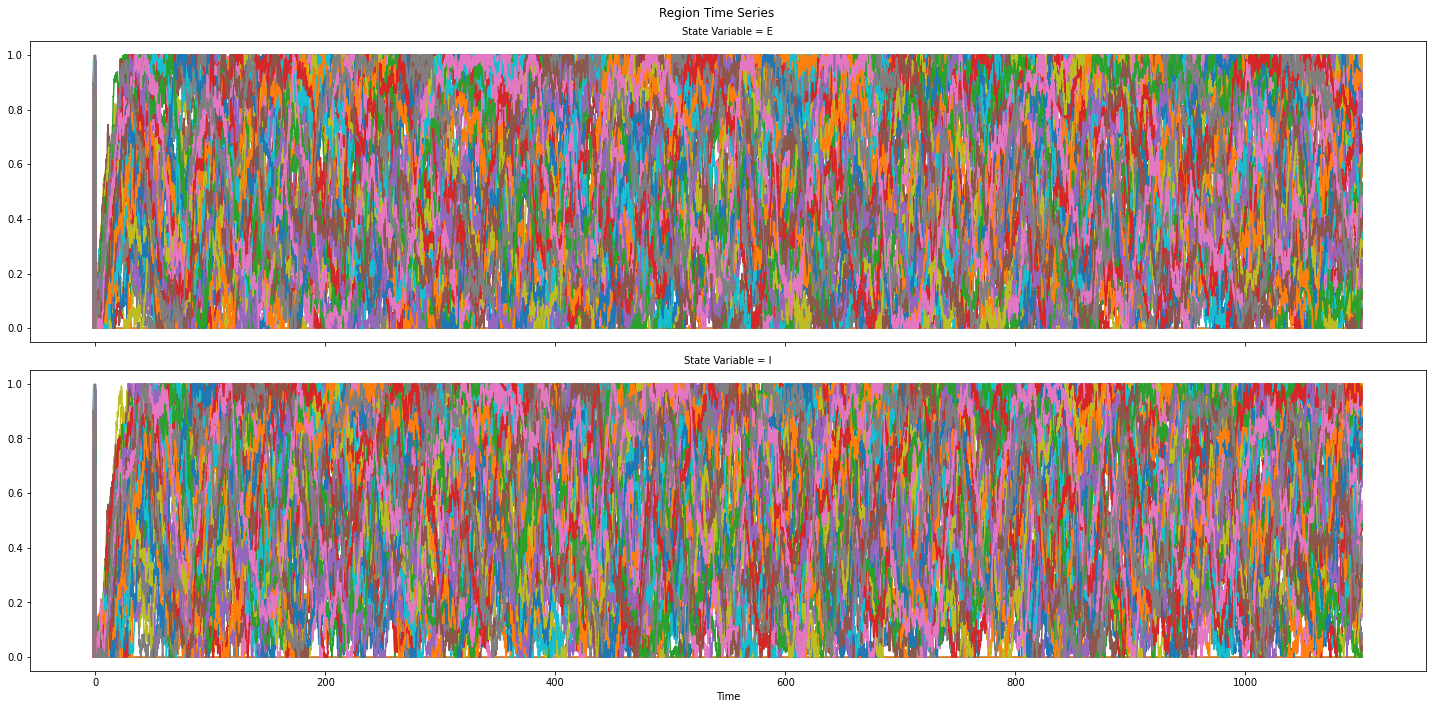

In [16]:
# Plot TVB time series
if source_ts is not None:
    source_ts.plot_timeseries(plotter_config=plotter.config, 
                          hue="Region" if source_ts.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                          per_variable=source_ts.shape[1] > MAX_VARS_IN_COLS, 
                          figsize=FIGSIZE);

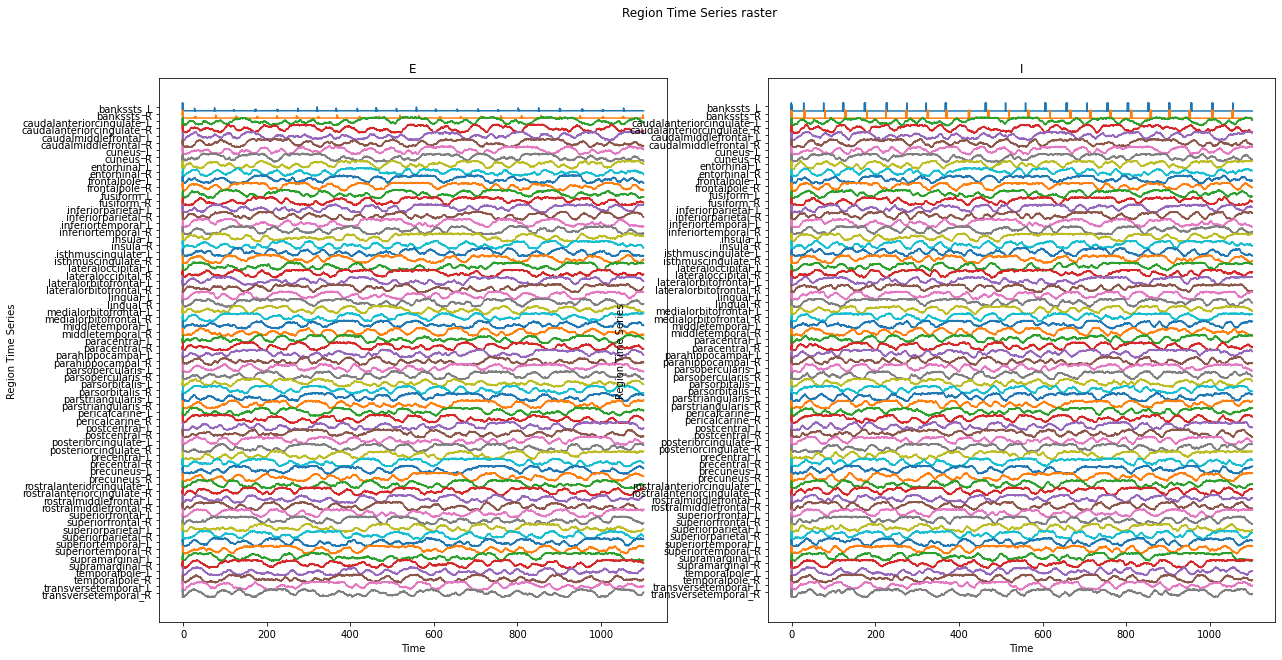

In [17]:
# Focus on the nodes modelled in NEST: raster plot
if source_ts is not None and source_ts.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts.plot_raster(plotter_config=plotter.config, 
                          per_variable=source_ts.shape[1] > MAX_VARS_IN_COLS,
                          figsize=FIGSIZE, figname="Spiking nodes TVB Time Series Raster");

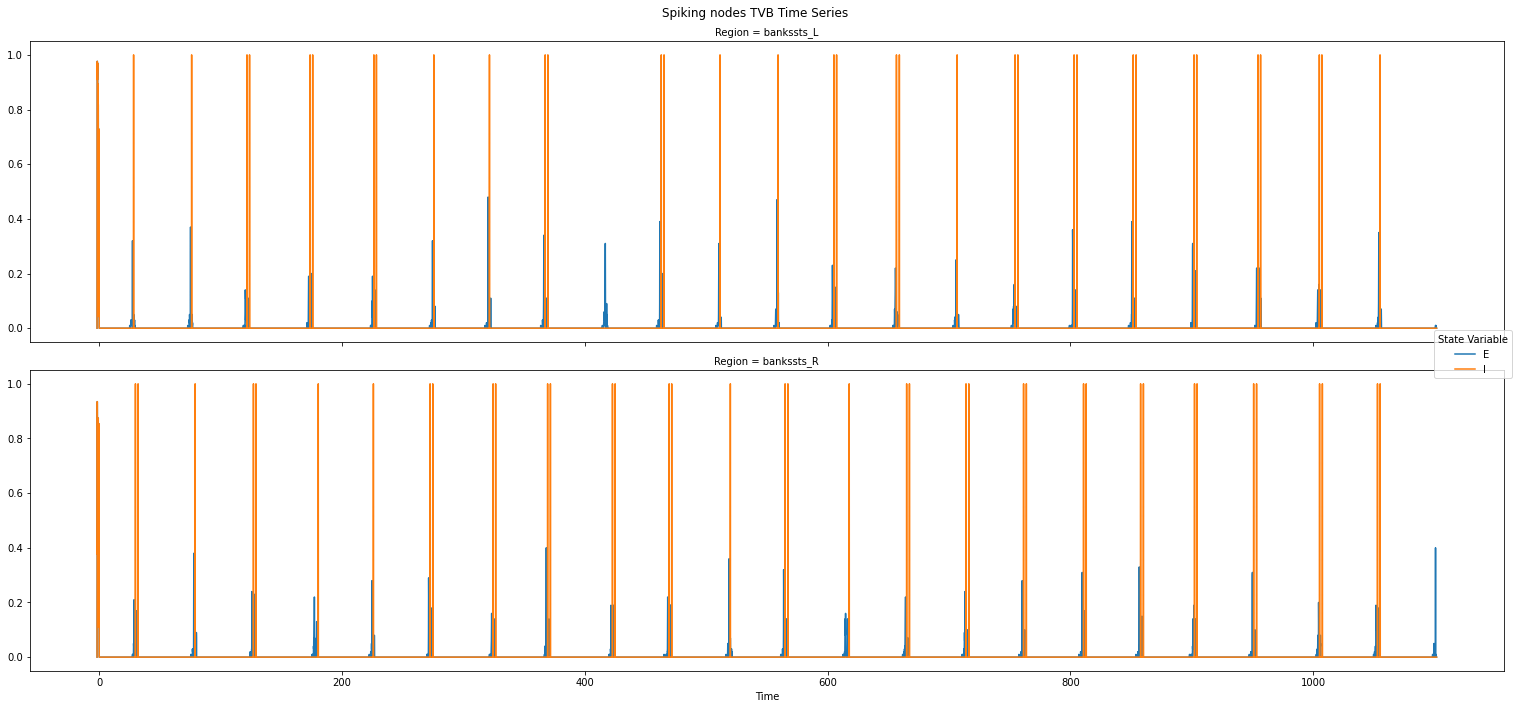

In [18]:
# Focus on the nodes modelled in NEST: 
n_spiking_nodes = len(nest_nodes_inds)
if source_ts is not None and n_spiking_nodes:
    source_ts_nest = source_ts[:, :, nest_nodes_inds]
    source_ts_nest.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_nest.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_nest.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="Spiking nodes TVB Time Series");

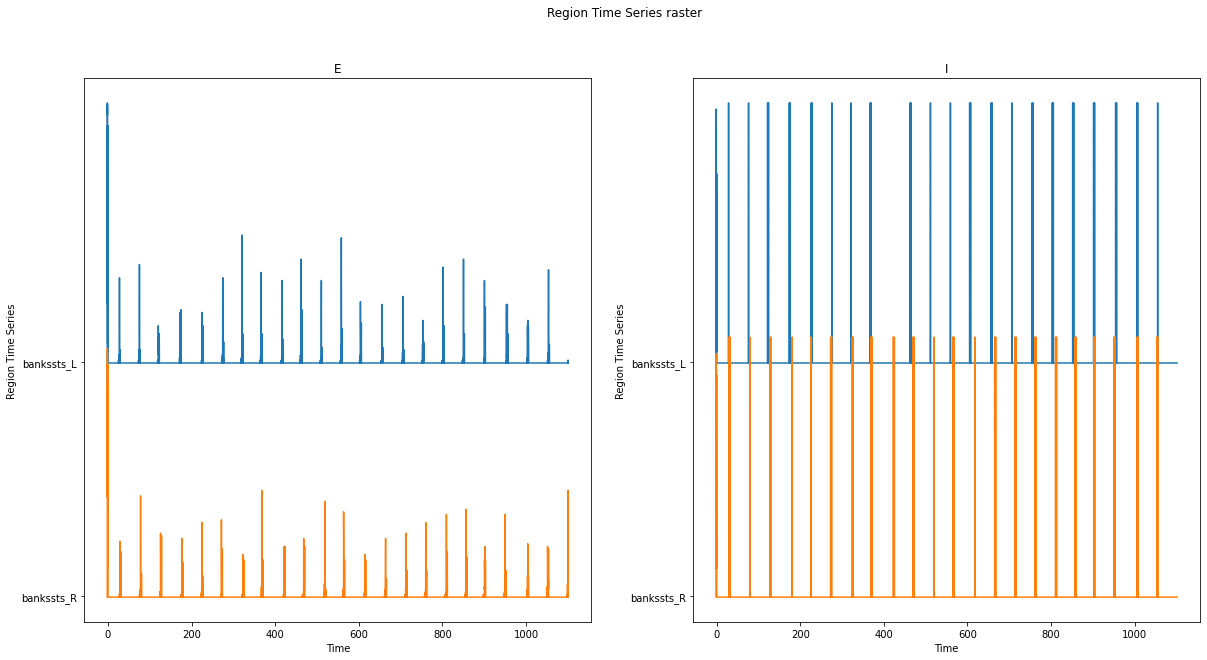

In [19]:
# Focus on the nodes modelled in NEST: raster plot
if source_ts is not None and n_spiking_nodes: # and source_ts_nest.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_nest.plot_raster(plotter_config=plotter.config, 
                               per_variable=source_ts_nest.shape[1] > MAX_VARS_IN_COLS,
                               figsize=FIGSIZE, figname="Spiking nodes TVB Time Series Raster");

### Interactive time series plot

In [20]:
# # ...interactively as well
# # For interactive plotting:
# %matplotlib notebook 
# plotter.plot_timeseries_interactive(source_ts)

### Spiking Network plots

In [21]:
# spikeNet_app.plot(time=t, transient=transient,
#                   plot_per_neuron=plot_per_neuron, plotter=plotter, writer=writer)

# If you want to see what the function above does, take the steps, one by one:


In [22]:
spikeNet_analyzer = None
if nest_network is not None:
    from tvb_multiscale.core.data_analysis.spiking_network_analyser import SpikingNetworkAnalyser
    # Create a SpikingNetworkAnalyzer:
    spikeNet_analyzer = \
        SpikingNetworkAnalyser(spikeNet=nest_network,
                               start_time=0.0, end_time=simulation_length, 
                               transient=transient, time_series_output_type="TVB", 
                               return_data=True, force_homogeneous_results=True, 
                               period=simulator.monitors[0].period, connectivity=simulator.connectivity
                              )


### Plot spikes' raster and mean spike rates and correlations

In [23]:
spikes_res = None
if spikeNet_analyzer is not None:
    # Spikes rates and correlations per Population and Region
    spikes_res = \
        spikeNet_analyzer.\
            compute_spikeNet_spikes_rates_and_correlations(
                populations_devices=None, regions=None,
                rates_methods=[], rates_kwargs=[{}],rate_results_names=[],
                corrs_methods=[], corrs_kwargs=[{}], corrs_results_names=[], bin_kwargs={},
                data_method=spikeNet_analyzer.get_spikes_from_device, data_kwargs={},
                return_devices=False
            );


2023-09-07 16:07:44,342 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:07:44,342 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!


/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 105 last spike(s) of the input spiketrain


<xarray.DataArray "Mean Populations' Spikes' Rates" (Population: 2, Region: 2)>
array([[29.14092081, 29.86844722],
       [33.88479164, 38.86784923]])
Coordinates:
  * Region      (Region) object 'bankssts_L' 'bankssts_R'
  * Population  (Population) object 'E' 'I'
<xarray.DataArray "Populations' Correlation Coefficient" (Population_i: 2,
                                                          Population_j: 2,
                                                          Region_i: 2,
                                                          Region_j: 2)>
array([[[[ 1.        ,  0.05980084],
         [ 0.05980084,  1.        ]],

        [[ 0.00712281,  0.0110927 ],
         [ 0.00518112,  0.01000256]]],


       [[[ 0.00712281,  0.00518112],
         [ 0.0110927 ,  0.01000256]],

        [[ 1.        , -0.00345066],
         [-0.00345066,  1.        ]]]])
Coordinates:
  * Population_j  (Population_j) object 'E' 'I'
  * Region_j      (Region_j) object 'bankssts_L' 'bankssts_R'
  * Populat

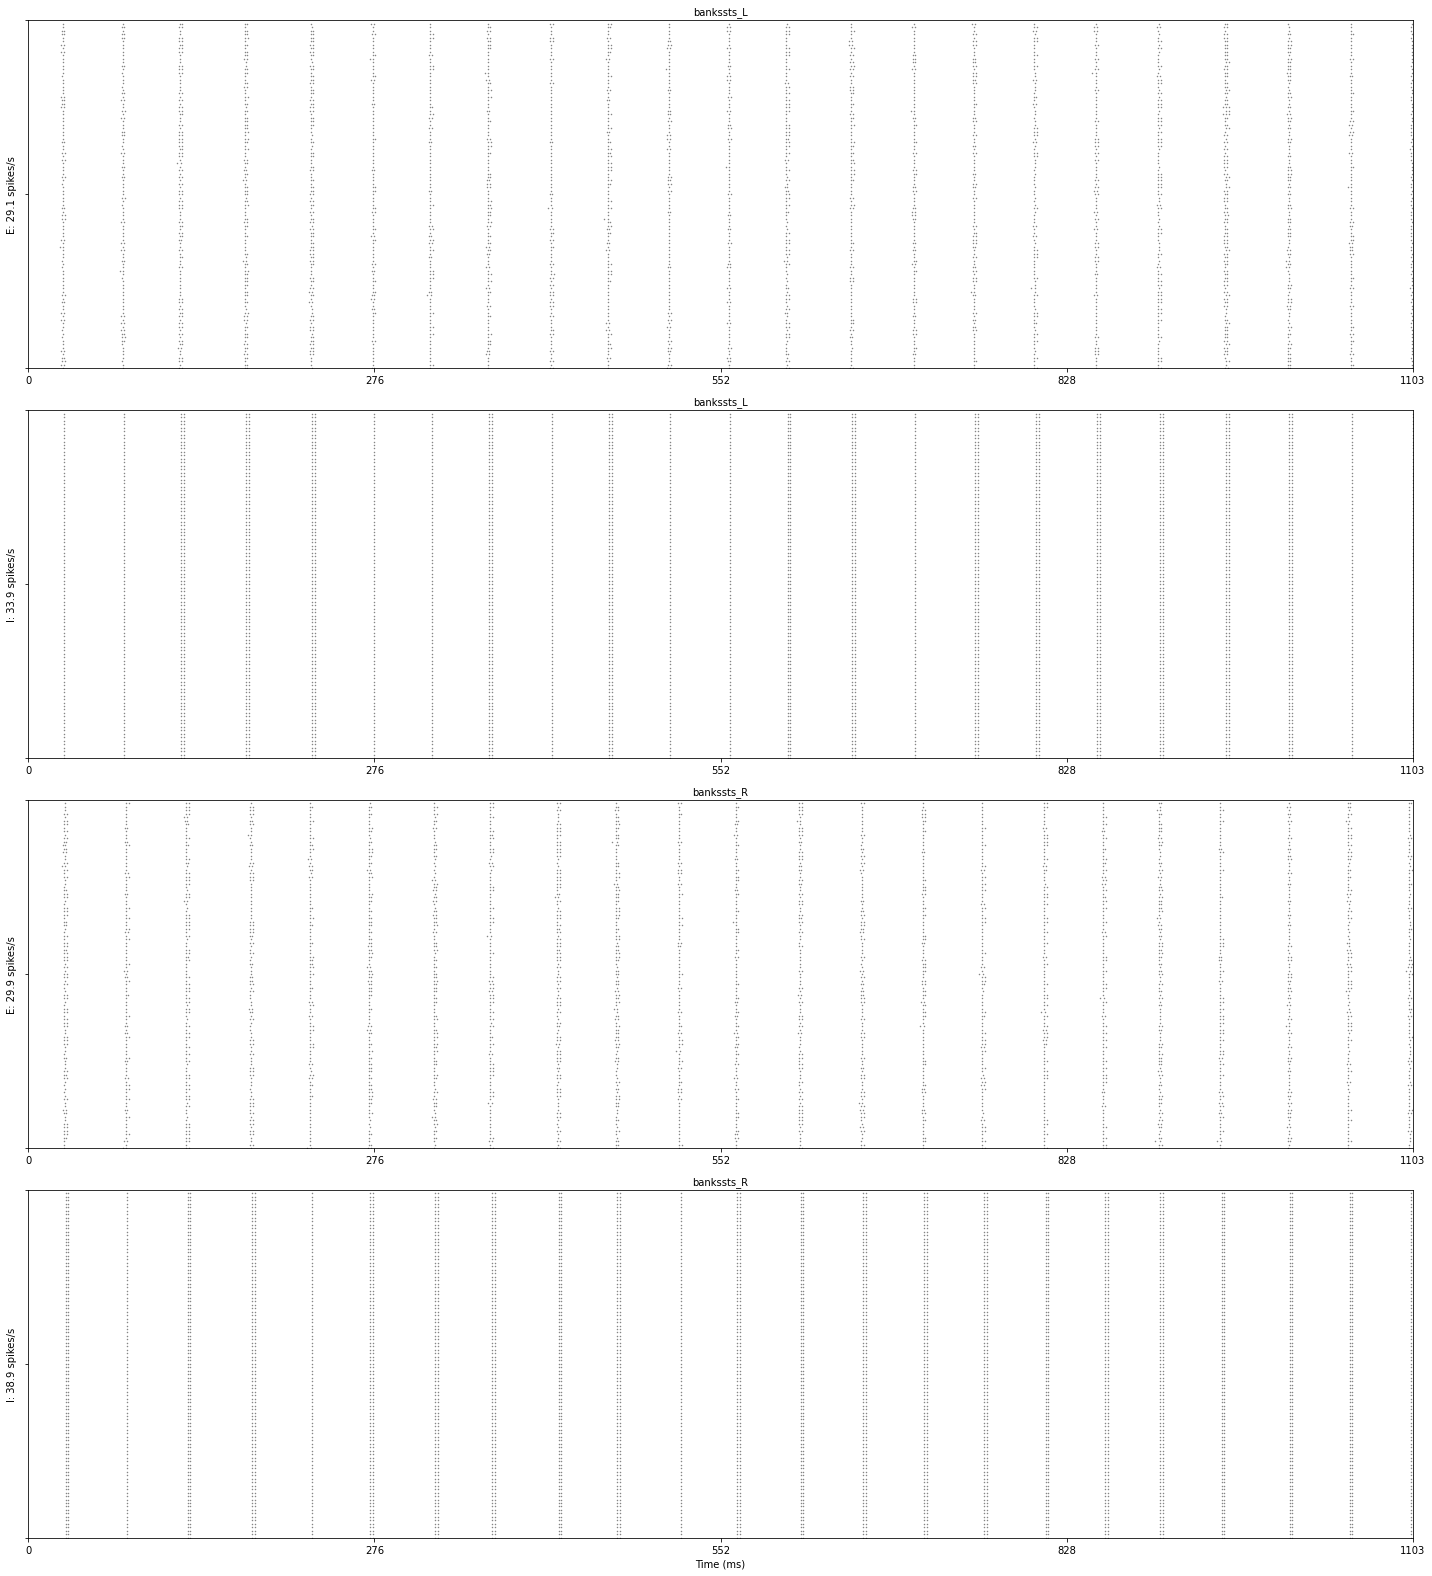

<Figure size 432x288 with 0 Axes>

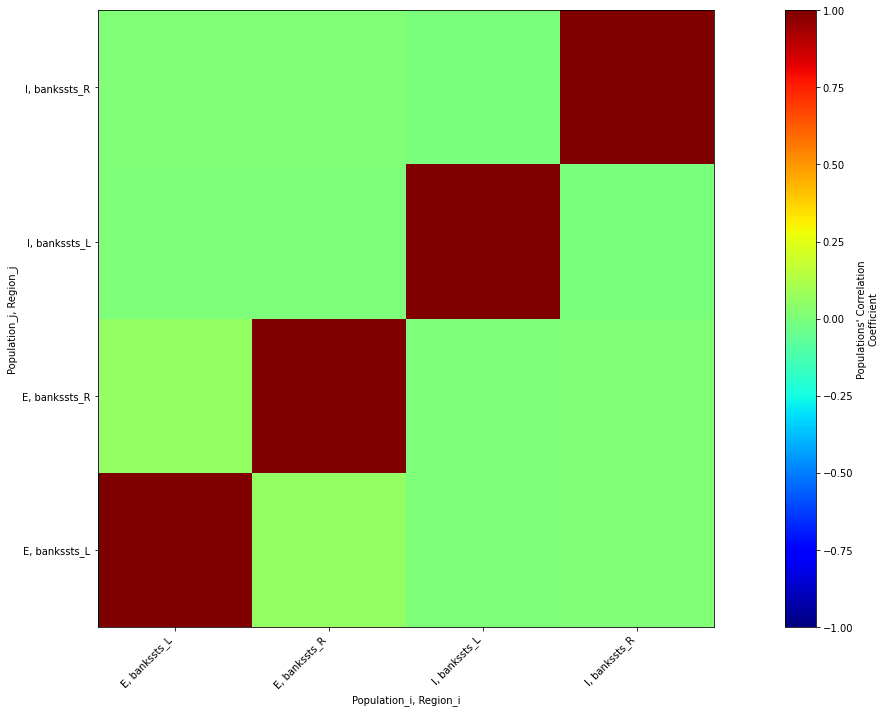

In [24]:
if spikes_res:
    print(spikes_res["mean_rate"])
    print(spikes_res["spikes_correlation_coefficient"])
    # Plot spikes' rasters together with mean population's spikes' rates' time series
    if plotter:
        plotter.plot_spike_events(spikes_res["spikes"], mean_results=spikes_res["mean_rate"], # time_series=spikes_res["mean_rate_time_series"], 
                                  figsize=(20, 22),  
                                  stimulus=None,
                                  stimulus_linewidth=5.0,
                                  spikes_markersize=0.5, spikes_alpha=0.5,
                                  n_y_ticks=3, n_time_ticks=5, show_time_axis=True, 
                                  time_axis_min=0.0, time_axis_max=simulation_length)
        from tvb_multiscale.core.plot.correlations_plot import plot_correlations
        plot_correlations(spikes_res["spikes_correlation_coefficient"], plotter)

In [25]:
if spikes_res:
    print("Mean spike rates:")
    for pop in spikes_res["mean_rate"].coords["Population"]:
        for reg in spikes_res["mean_rate"].coords["Region"]:
            if not np.isnan(spikes_res["mean_rate"].loc[pop, reg]):
                print("%s - %s: %g" % (pop.values.item().split("_spikes")[0], reg.values.item(), 
                                       spikes_res["mean_rate"].loc[pop, reg].values.item()))

    # savemat(os.path.join(config.out.FOLDER_RES, "spikes_mean_rates.mat"), spikes_res["mean_rate"].to_dict())

# Mean spike rates:
# def_min_delay = 0.1ms, w_TVB_to_NEST = 5000.0, synchronization_time = min_tvb_delay
# E - bankssts_L: 28.85
# E - bankssts_R: 27.8552
# I - bankssts_L: 28.85
# I - bankssts_R: 27.8552


# def_min_delay = 1.0 ms, w_TVB_to_NEST = 2500.0:

# Mean spike rates, synchronization_time = min_tvb_delay:
# E - bankssts_L: 28.3725
# E - bankssts_R: 30.1632
# I - bankssts_L: 30.8396
# I - bankssts_R: 39.7931
# completed in 77.6139 sec!

# With synchronization_time = min_tvb_delay / 2:
# Mean spike rates:
# E - bankssts_L: 29.1409
# E - bankssts_R: 29.8684
# I - bankssts_L: 33.8848
# I - bankssts_R: 38.8678
# completed in 95.1373 sec

Mean spike rates:
E - bankssts_L: 29.1409
E - bankssts_R: 29.8684
I - bankssts_L: 33.8848
I - bankssts_R: 38.8678


In [26]:
spikes_sync = None

if spikeNet_analyzer is not None:

    spikeNet_analyzer.resample = True
    spikes_sync = \
        spikeNet_analyzer.compute_spikeNet_synchronization(populations_devices=None, regions=None,
                                                           comp_methods=[spikeNet_analyzer.compute_spikes_sync, 
                                                                         spikeNet_analyzer.compute_spikes_sync_time_series, 
                                                                         spikeNet_analyzer.compute_spikes_distance, 
                                                                         spikeNet_analyzer.compute_spikes_distance_time_series,
                                                                         spikeNet_analyzer.compute_spikes_isi_distance, 
                                                                         spikeNet_analyzer.compute_spikes_isi_distance_time_series],
                                                           computations_kwargs=[{}], data_kwargs={},
                                                           return_spikes_trains=False, return_devices=False)
# print(spikes_sync)


2023-09-07 16:07:50,892 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:07:50,892 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!


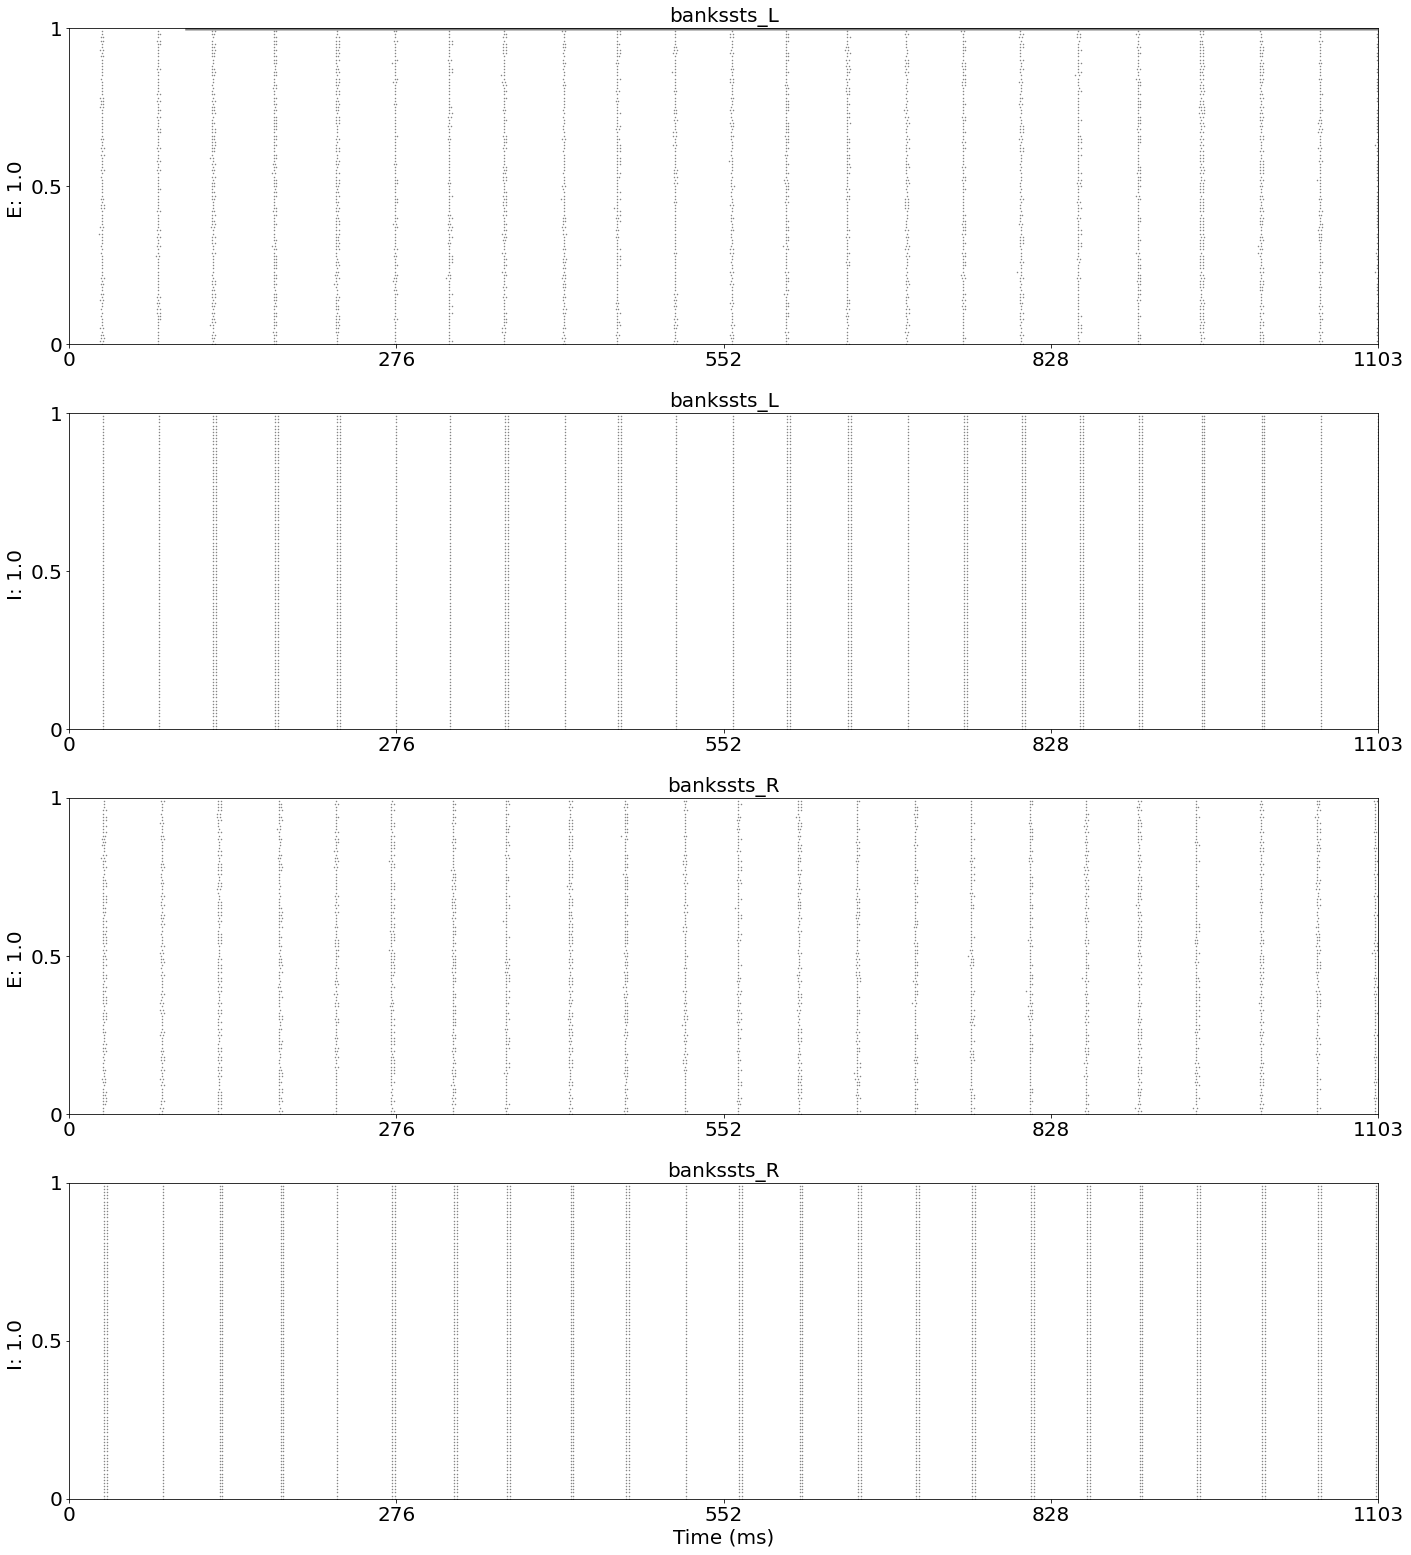

In [27]:
if spikes_sync:
    plotter.config.FONTSIZE = 20 # plotter.config.LARGE_FONTSIZE  # LARGE = 12, default = 10
    plotter.plot_spike_events(spikes_res["spikes"], 
                              time_series=spikes_sync["spikes_sync_time_series"], 
                              mean_results=spikes_sync["spikes_sync"], 
                              stimulus_linewidth=5.0,
                              spikes_markersize=0.5, spikes_alpha=0.5,
                              n_y_ticks=3, n_time_ticks=5, show_time_axis=True, 
                              time_axis_min=0.0, time_axis_max=simulation_length, figsize=(20, 22)
                              )

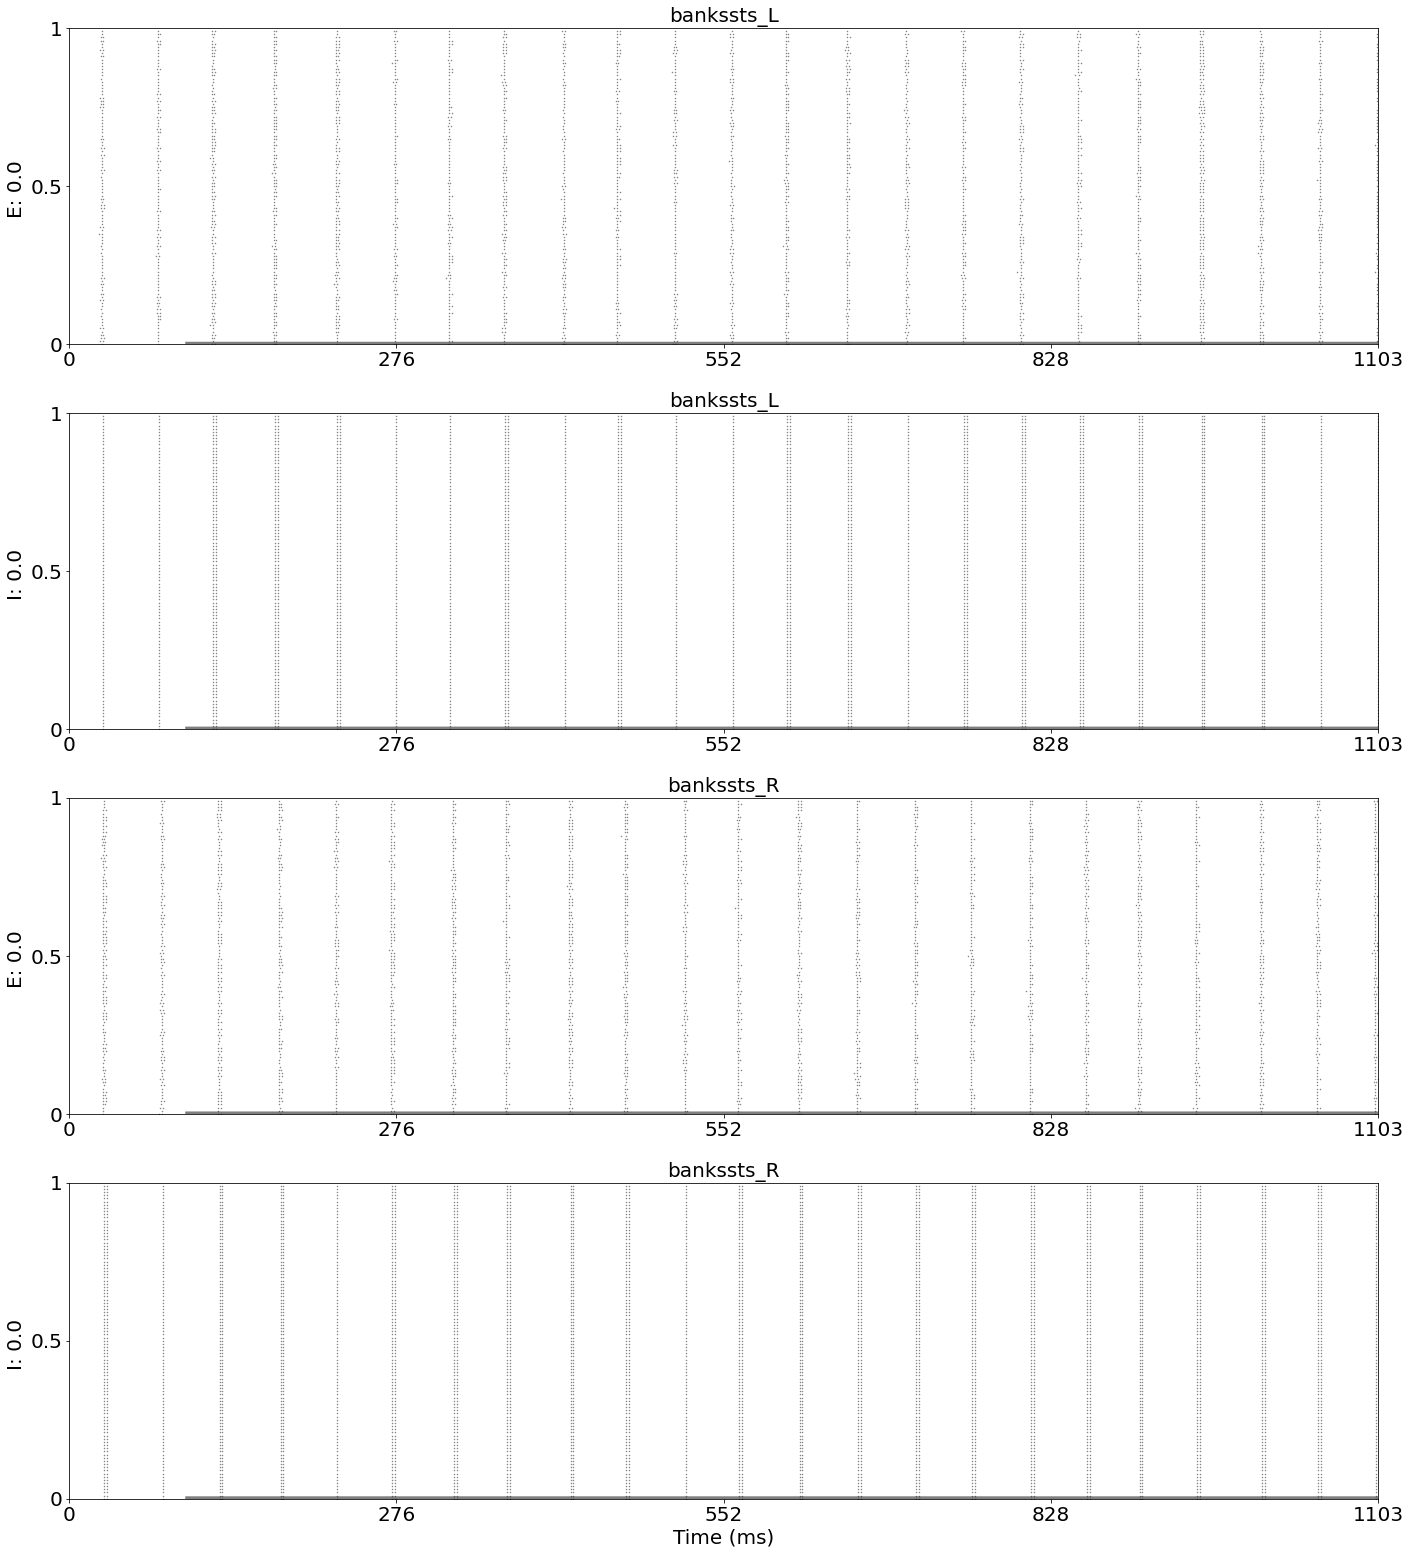

In [28]:
if spikes_sync:
    plotter.config.FONTSIZE = 20 # plotter.config.LARGE_FONTSIZE  # LARGE = 12, default = 10
    plotter.plot_spike_events(spikes_res["spikes"], 
                              time_series=spikes_sync["spikes_distance_time_series"], 
                              mean_results=spikes_sync["spikes_distance"], 
                              stimulus_linewidth=5.0,
                              spikes_markersize=0.5, spikes_alpha=0.5,
                              n_y_ticks=3, n_time_ticks=5, show_time_axis=True, 
                              time_axis_min=0.0, time_axis_max=simulation_length, figsize=(20, 22)
                                     )

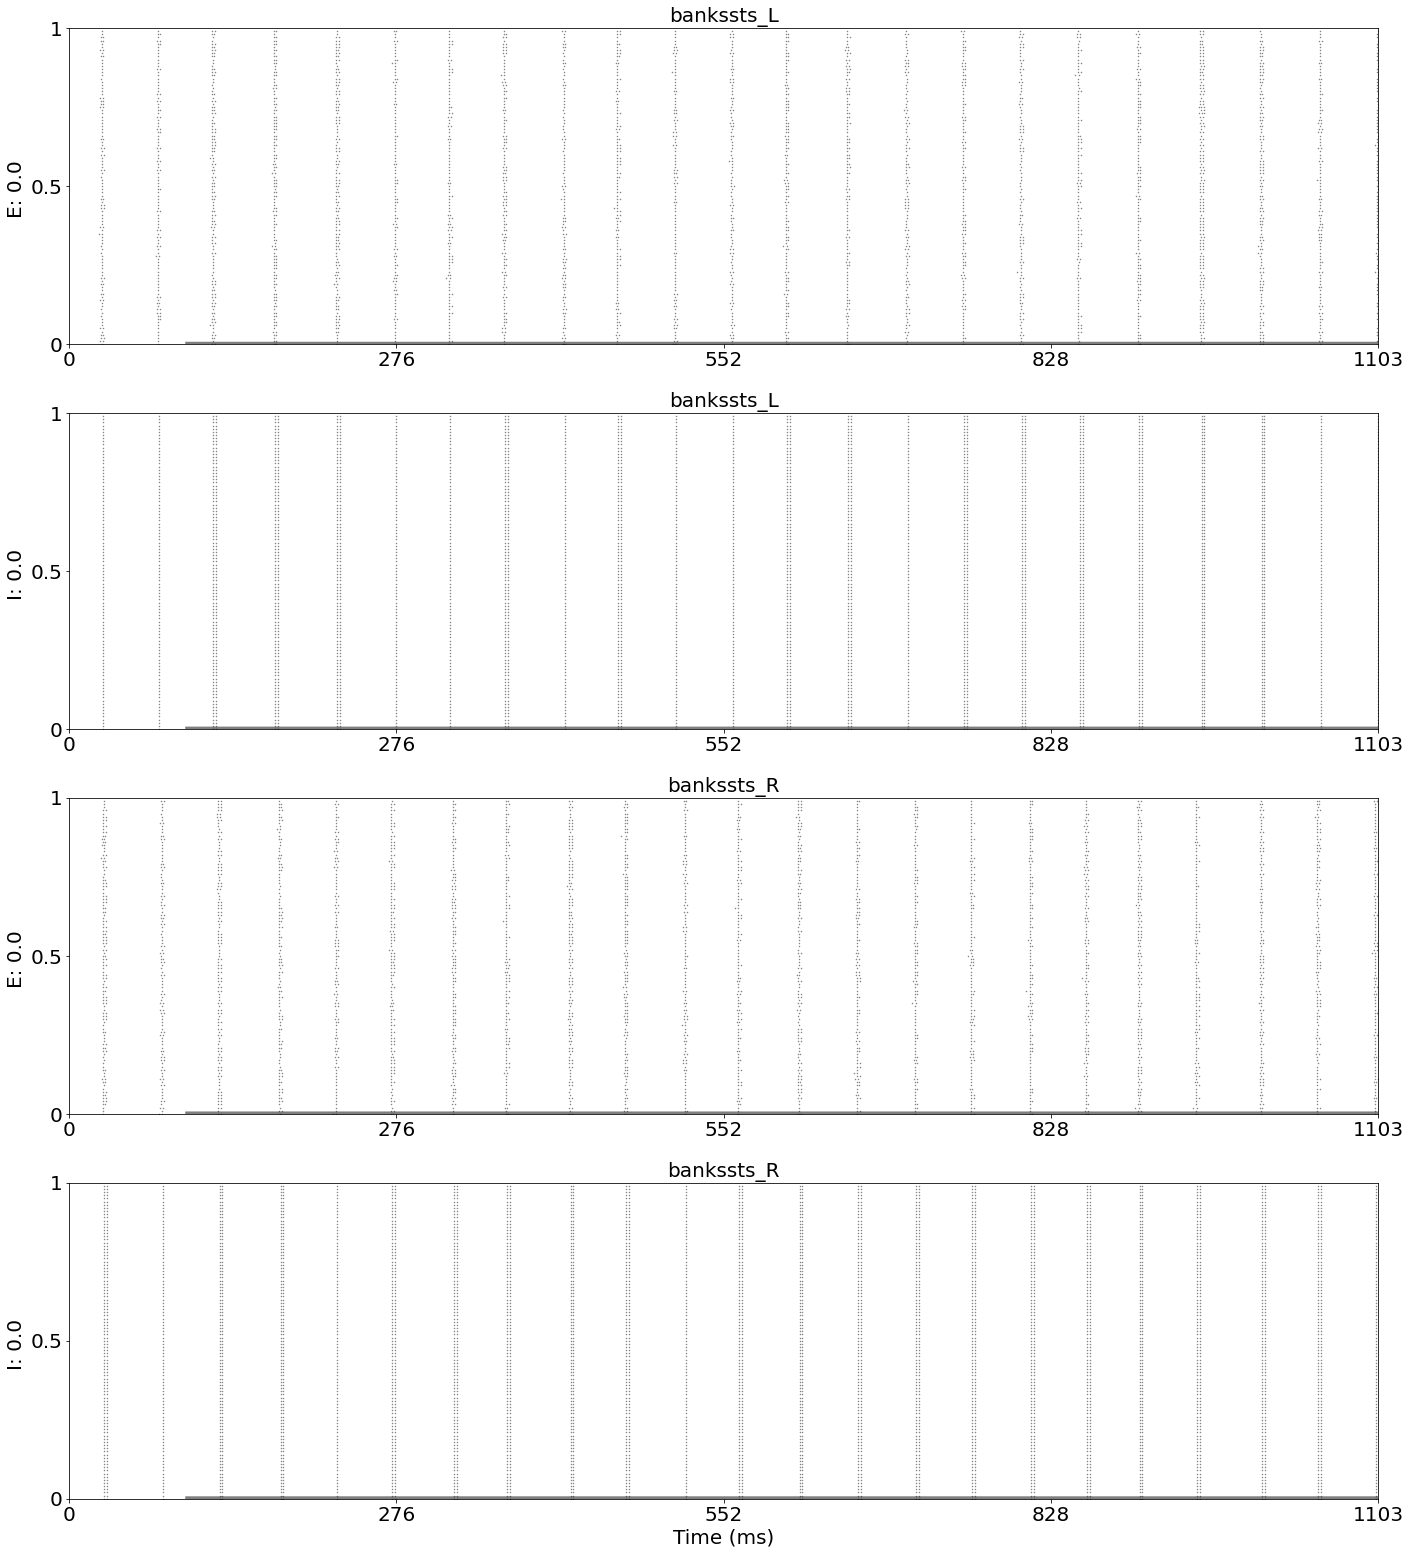

In [29]:
if spikes_sync:
    plotter.config.FONTSIZE = 20 # plotter.config.LARGE_FONTSIZE  # LARGE = 12, default = 10
    plotter.plot_spike_events(spikes_res["spikes"], 
                              time_series=spikes_sync["spikes_isi_distance_time_series"], 
                              mean_results=spikes_sync["spikes_isi_distance"], 
                              stimulus_linewidth=5.0,
                              spikes_markersize=0.5, spikes_alpha=0.5,
                              n_y_ticks=3, n_time_ticks=5, show_time_axis=True, 
                              time_axis_min=0.0, time_axis_max=simulation_length, figsize=(20, 22)
                                     )

In [30]:
if spikes_sync:
    print("Spike synchronization:")
    for pop in spikes_sync["spikes_sync"].coords["Population"]:
        for reg in spikes_sync["spikes_sync"].coords["Region"]:
            if not np.isnan(spikes_sync["spikes_sync"].loc[pop, reg]):
                print("%s - %s: %g" % (pop.values.item().split("_spikes")[0], reg.values.item(), 
                                       spikes_sync["spikes_sync"].loc[pop, reg].values.item()))

#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_sync.mat"), spikes_sync["spikes_sync"].to_dict())
#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_sync_time_series.mat"), spikes_sync["spikes_sync_time_series"].to_dict())

Spike synchronization:
E - bankssts_L: 1
E - bankssts_R: 1
I - bankssts_L: 1
I - bankssts_R: 1


In [31]:
if spikes_sync:
    print("Spike distance:")
    for pop in spikes_sync["spikes_distance"].coords["Population"]:
        for reg in spikes_sync["spikes_distance"].coords["Region"]:
            if not np.isnan(spikes_sync["spikes_distance"].loc[pop, reg]):
                print("%s - %s: %g" % (pop.values.item().split("_spikes")[0], reg.values.item(), 
                                       spikes_sync["spikes_distance"].loc[pop, reg].values.item()))

#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_distance.mat"), spikes_sync["spikes_distance"].to_dict())
#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_distance_time_series.mat"), spikes_sync["spikes_distance_time_series"].to_dict())

Spike distance:
E - bankssts_L: 0
E - bankssts_R: 0
I - bankssts_L: 0
I - bankssts_R: 0


In [32]:
if spikes_sync:
    print("Spike ISI distance:")
    for pop in spikes_sync["spikes_isi_distance"].coords["Population"]:
        for reg in spikes_sync["spikes_isi_distance"].coords["Region"]:
            if not np.isnan(spikes_sync["spikes_isi_distance"].loc[pop, reg]):
                print("%s - %s: %g" % (pop.values.item().split("_spikes")[0], reg.values.item(), 
                                       spikes_sync["spikes_isi_distance"].loc[pop, reg].values.item()))

#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_isi_distance.mat"), spikes_sync["spikes_isi_distance"].to_dict())
#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_isi_distance_time_series.mat"), spikes_sync["spikes_isi_distance_time_series"].to_dict())

Spike ISI distance:
E - bankssts_L: 0
E - bankssts_R: 0
I - bankssts_L: 0
I - bankssts_R: 0


In [33]:
if spikes_res and writer:
    writer.write_object(spikes_res["spikes"].to_dict(), 
                        path=os.path.join(config.out.FOLDER_RES,  "Spikes") + ".h5");
    writer.write_object(spikes_res["mean_rate"].to_dict(),
                        path=os.path.join(config.out.FOLDER_RES,
                                          spikes_res["mean_rate"].name) + ".h5");
    write_RegionTimeSeriesXarray_to_h5(spikes_res["mean_rate_time_series"], writer,
                                       os.path.join(config.out.FOLDER_RES,
                                                    spikes_res["mean_rate_time_series"].title + ".h5"),
                                       recursive=False);
    writer.write_object(spikes_res["spikes_correlation_coefficient"].to_dict(),
                        path=os.path.join(config.out.FOLDER_RES,
                                          spikes_res["spikes_correlation_coefficient"].name) + ".h5");

### Get  SpikingNetwork mean field variable time series and plot them

2023-09-07 16:08:35,774 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:08:35,774 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:08:35,787 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:08:35,787 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:08:35,795 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:08:35,795 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!


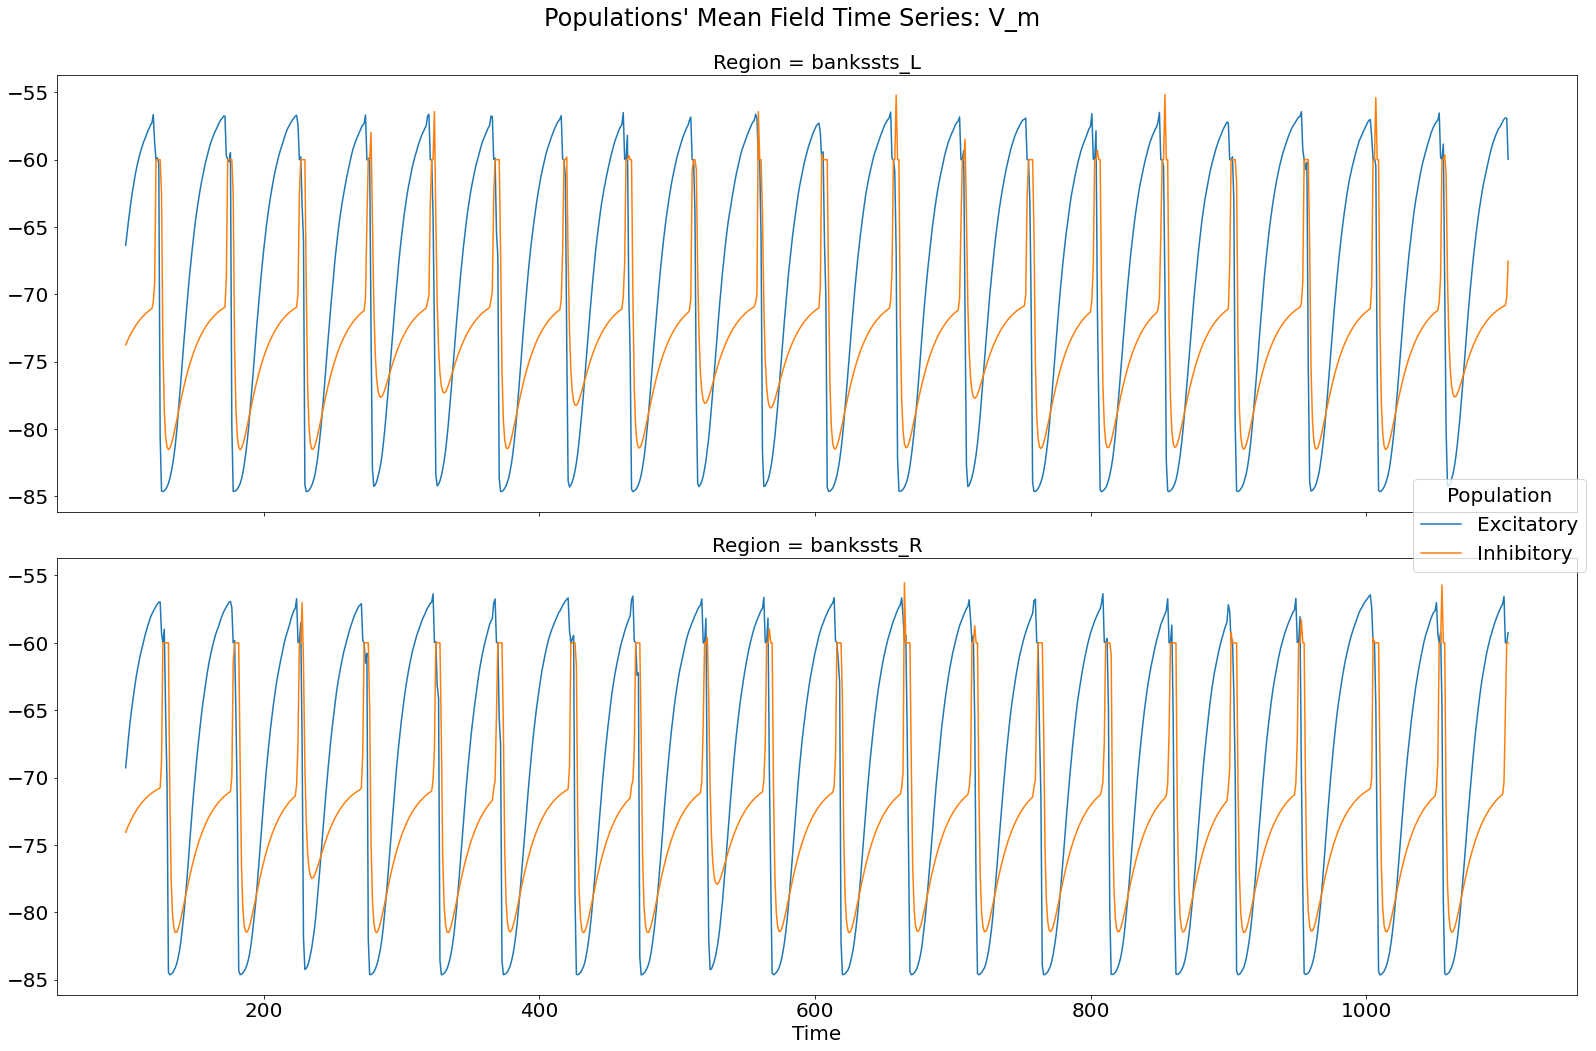

In [34]:
# Continuous time variables' data of spiking neurons
spikeNet_ts = None
mean_field_ts = None
if spikeNet_analyzer:
    if plot_per_neuron:
        spikeNet_analyzer.return_data = True
    else:
        spikeNet_analyzer.return_data = False
    spikeNet_ts = \
        spikeNet_analyzer. \
             compute_spikeNet_mean_field_time_series(populations_devices=None, regions=None, variables=None,
                                                     computations_kwargs={}, data_kwargs={}, return_devices=False)
    if spikeNet_ts:
        if plot_per_neuron:
            mean_field_ts = spikeNet_ts["mean_field_time_series"]  # mean field
            spikeNet_ts = spikeNet_ts["data_by_neuron"]  # per neuron data
        else:
            mean_field_ts = spikeNet_ts
            spikeNet_ts = None
        if mean_field_ts and mean_field_ts.size > 0:
            mean_field_ts.plot_timeseries(plotter_config=plotter.config, 
                                          per_variable=mean_field_ts.shape[1] > MAX_VARS_IN_COLS)
            if mean_field_ts.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
                mean_field_ts.plot_raster(plotter_config=plotter.config, 
                                          per_variable=mean_field_ts.shape[1] > MAX_VARS_IN_COLS,
                                          linestyle="--", alpha=0.5, linewidth=0.5)


In [35]:
# Write results to file:
if mean_field_ts and writer:
    write_RegionTimeSeriesXarray_to_h5(mean_field_ts, writer,
                                       os.path.join(config.out.FOLDER_RES, mean_field_ts.title + ".h5"), 
                                       recursive=False)

### Compute per neuron spikes' rates times series and plot them

In [36]:
if spikes_res and plot_per_neuron:
    from tvb.simulator.plot.base_plotter import pyplot
    spikeNet_analyzer.return_data = False
    rates_ts_per_neuron = \
        spikeNet_analyzer. \
            compute_spikeNet_rates_time_series(populations_devices=None, regions=None,
                                               computations_kwargs={}, data_kwargs={},
                                               return_spikes_trains=False, return_devices=False);
    if rates_ts_per_neuron is not None and rates_ts_per_neuron.size:
        # Regions in rows
        row = rates_ts_per_neuron.dims[2] if rates_ts_per_neuron.shape[2] > 1 else None
        if row is None:
            # Populations in rows
            row = rates_ts_per_neuron.dims[1] if rates_ts_per_neuron.shape[1] > 1 else None
            col = None
        else:
            # Populations in columns
            col = rates_ts_per_neuron.dims[1] if rates_ts_per_neuron.shape[1] > 1 else None
        pyplot.figure()
        rates_ts_per_neuron.plot(y=rates_ts_per_neuron.dims[3], row=row, col=col, cmap="jet")
        plotter.base._save_figure(figure_name="Spike rates per neuron")
        # del rates_ts_per_neuron # to free memory

### Plot per neuron SpikingNetwork time series

In [37]:
# Regions in rows
if spikeNet_ts is not None and spikeNet_ts.size:
    row = spikeNet_ts.dims[2] if spikeNet_ts.shape[2] > 1 else None
    if row is None:
        # Populations in rows
        row = spikeNet_ts.dims[3] if spikeNet_ts.shape[3] > 1 else None
        col = None
    else:
        # Populations in cols
         col = spikeNet_ts.dims[3] if spikeNet_ts.shape[3] > 1 else None
    for var in spikeNet_ts.coords[spikeNet_ts.dims[1]]:
        this_var_ts = spikeNet_ts.loc[:, var, :, :, :]
        this_var_ts.name = var.item()
        pyplot.figure()
        this_var_ts.plot(y=spikeNet_ts.dims[4], row=row, col=col, cmap="jet", figsize=FIGSIZE)
        plotter.base._save_figure(
            figure_name="Spiking Network variables' time series per neuron: %s" % this_var_ts.name)
    del spikeNet_ts # to free memory


Plotting results with App NESTNRPApp...
2023-09-07 16:09:04,670 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:09:04,670 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!


/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 105 last spike(s) of the input spiketrain


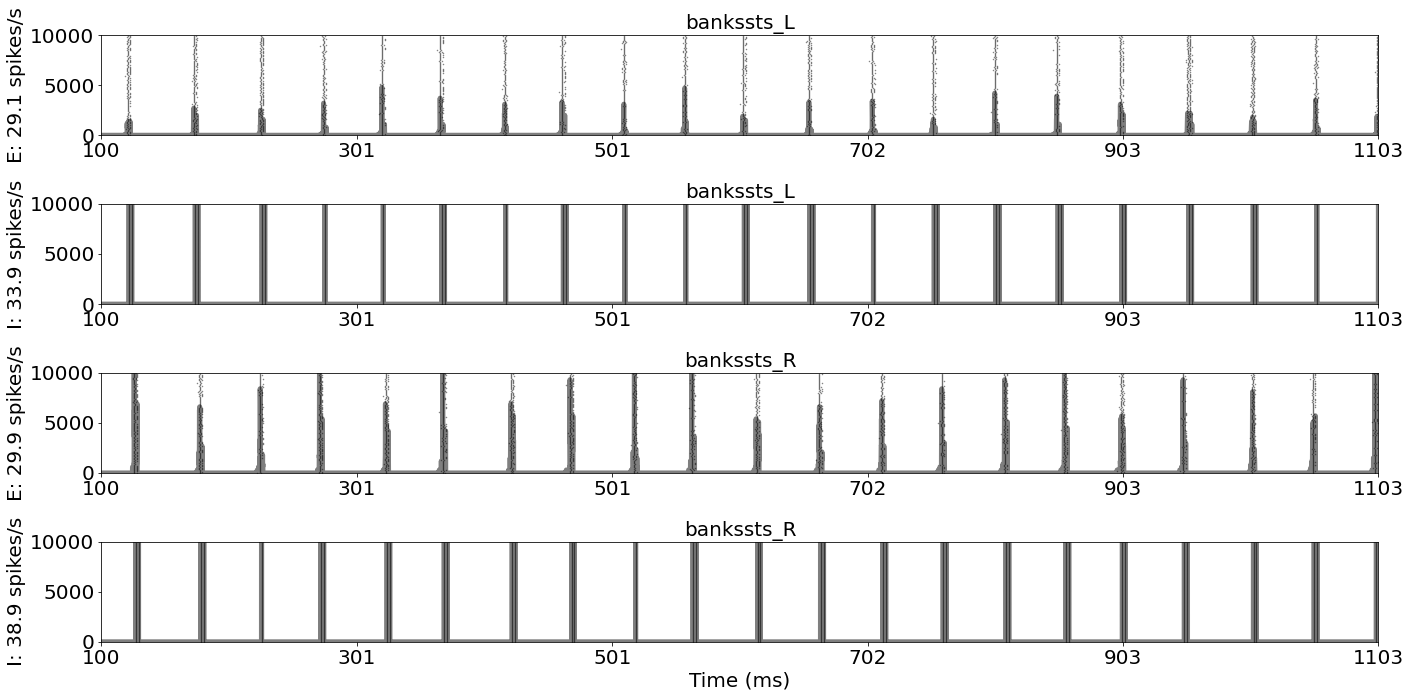

Mean spike rates:
E - bankssts_L: 29.1482
E - bankssts_R: 29.8893
I - bankssts_L: 33.8865
I - bankssts_R: 38.9358
<xarray.DataArray "Populations' Spikes' Correlation Coefficient" (
                                                                  Population_i: 2,
                                                                  Population_j: 2,
                                                                  Region_i: 2,
                                                                  Region_j: 2)>
array([[[[ 1.        ,  0.05980084],
         [ 0.05980084,  1.        ]],

        [[ 0.00712281,  0.0110927 ],
         [ 0.00518112,  0.01000256]]],


       [[[ 0.00712281,  0.00518112],
         [ 0.0110927 ,  0.01000256]],

        [[ 1.        , -0.00345066],
         [-0.00345066,  1.        ]]]])
Coordinates:
  * Population_j  (Population_j) object 'E' 'I'
  * Region_j      (Region_j) object 'bankssts_L' 'bankssts_R'
  * Population_i  (Population_i) object 'E' 'I'
  * Region_i    

<Figure size 432x288 with 0 Axes>

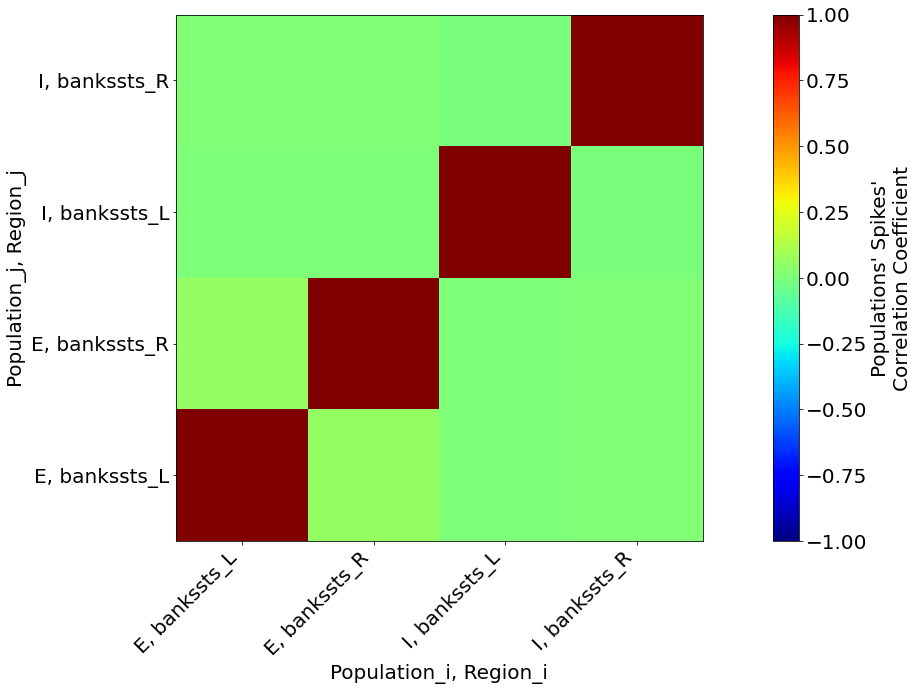

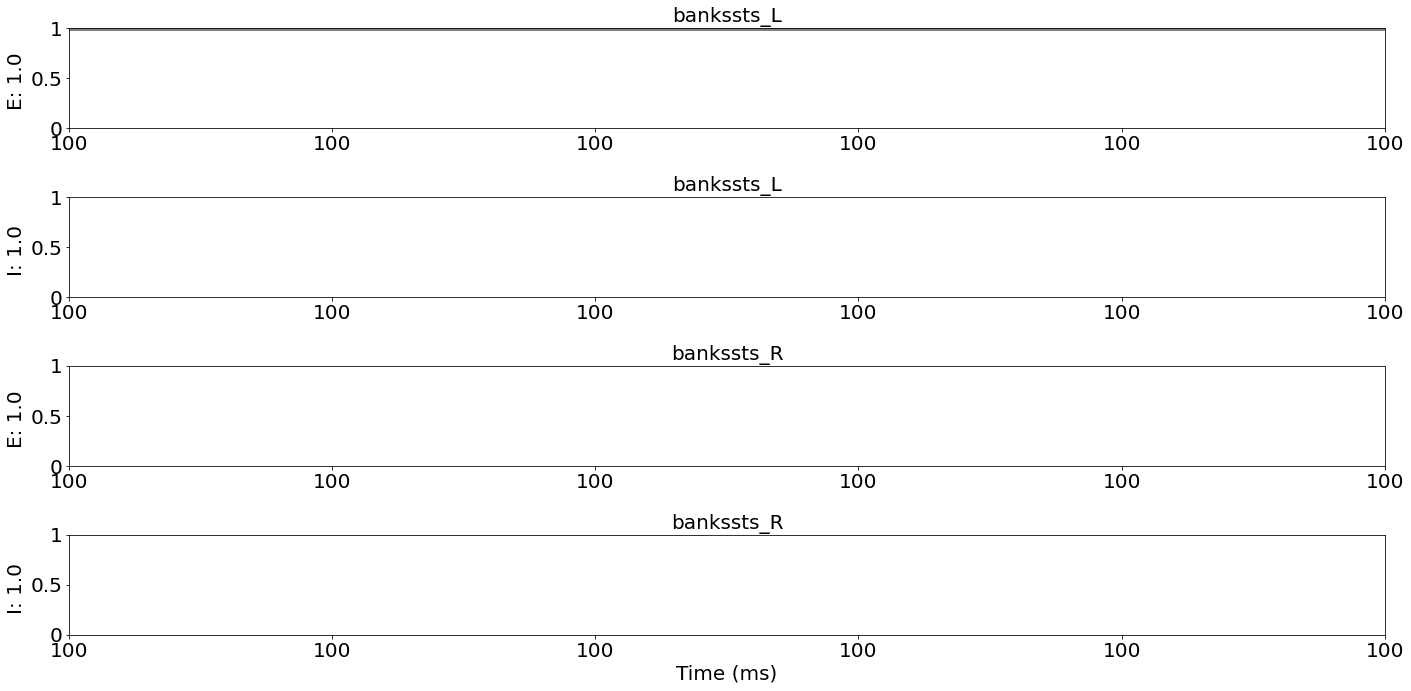

2023-09-07 16:09:17,794 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:09:17,794 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:09:17,810 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:09:17,810 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:09:17,820 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!
2023-09-07 16:09:17,820 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model  for  created!


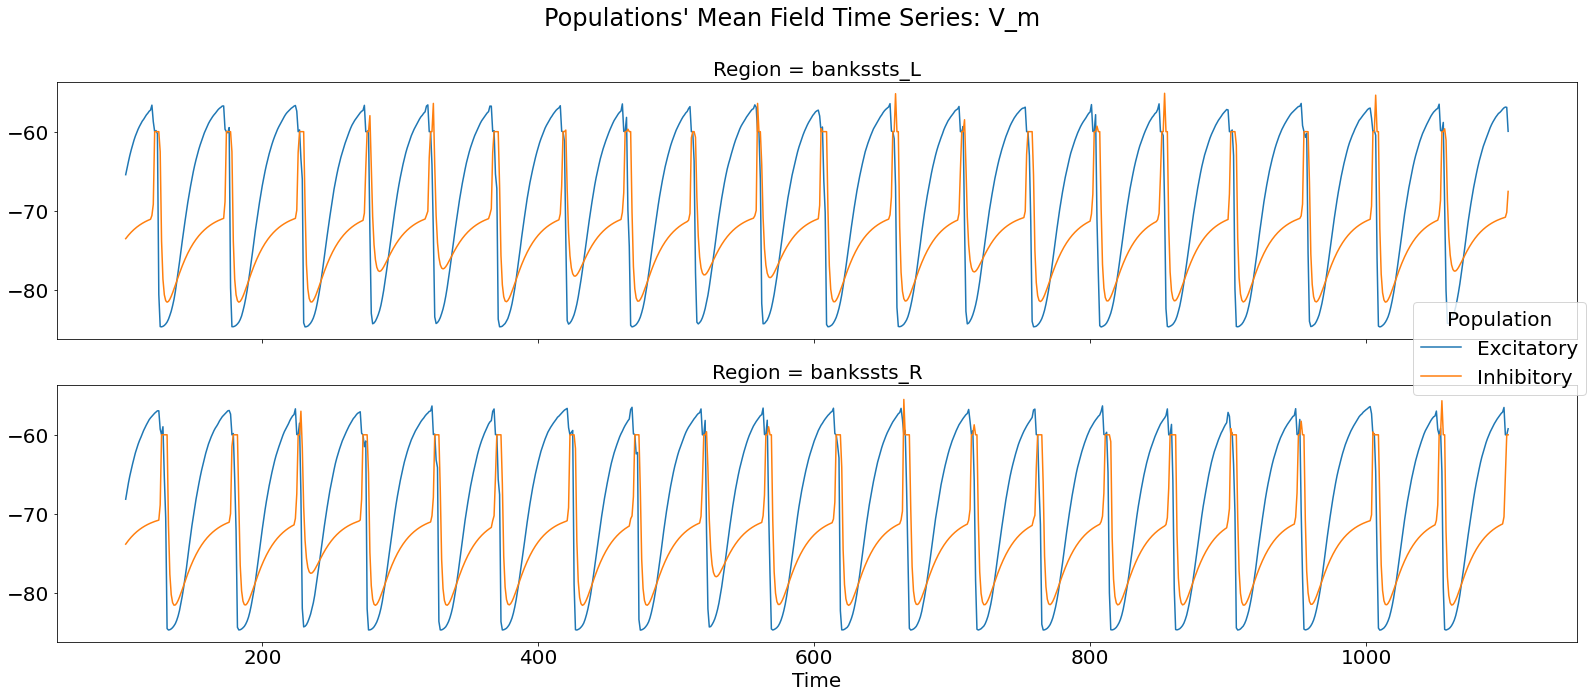


Stopping App NESTNRPApp...

Stopping App NRPTVBtoSpikeNetTransformerApp...

Stopping App NRPSpikeNetToTVBTransformerApp...

Plotting results with App NRPTVBApp...


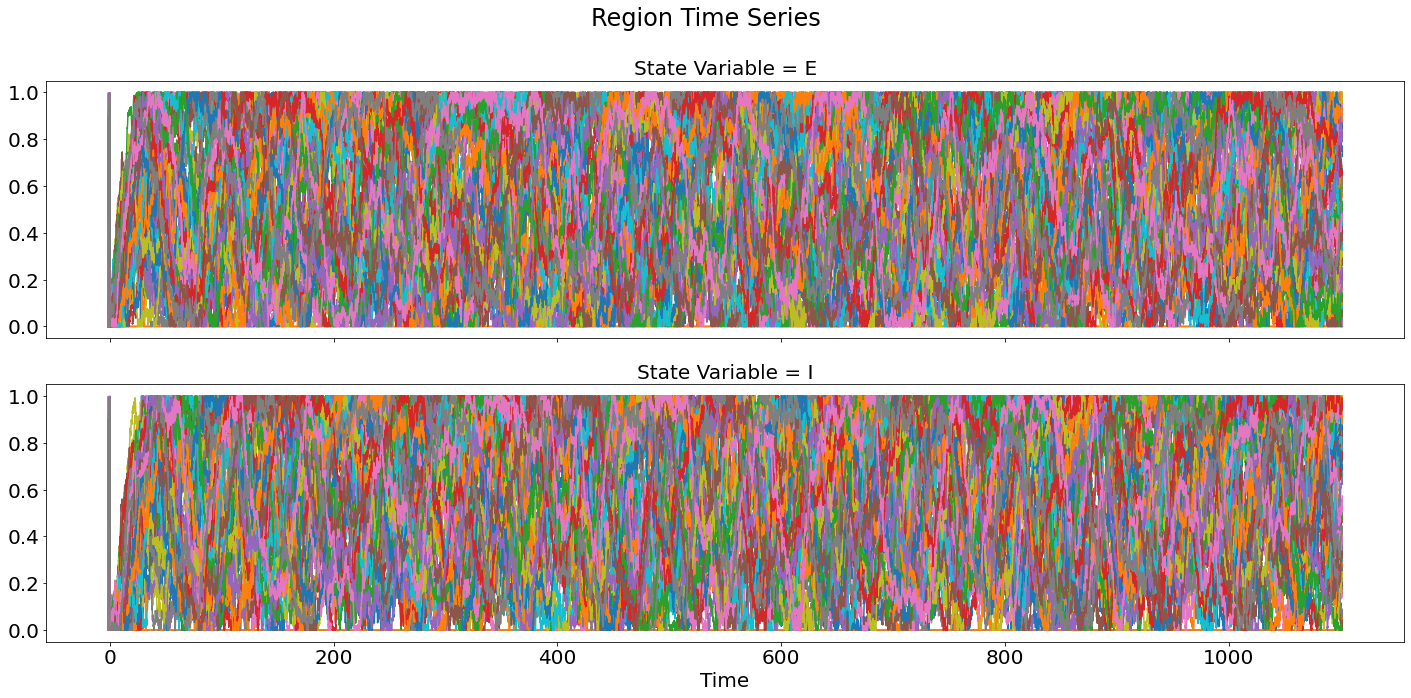

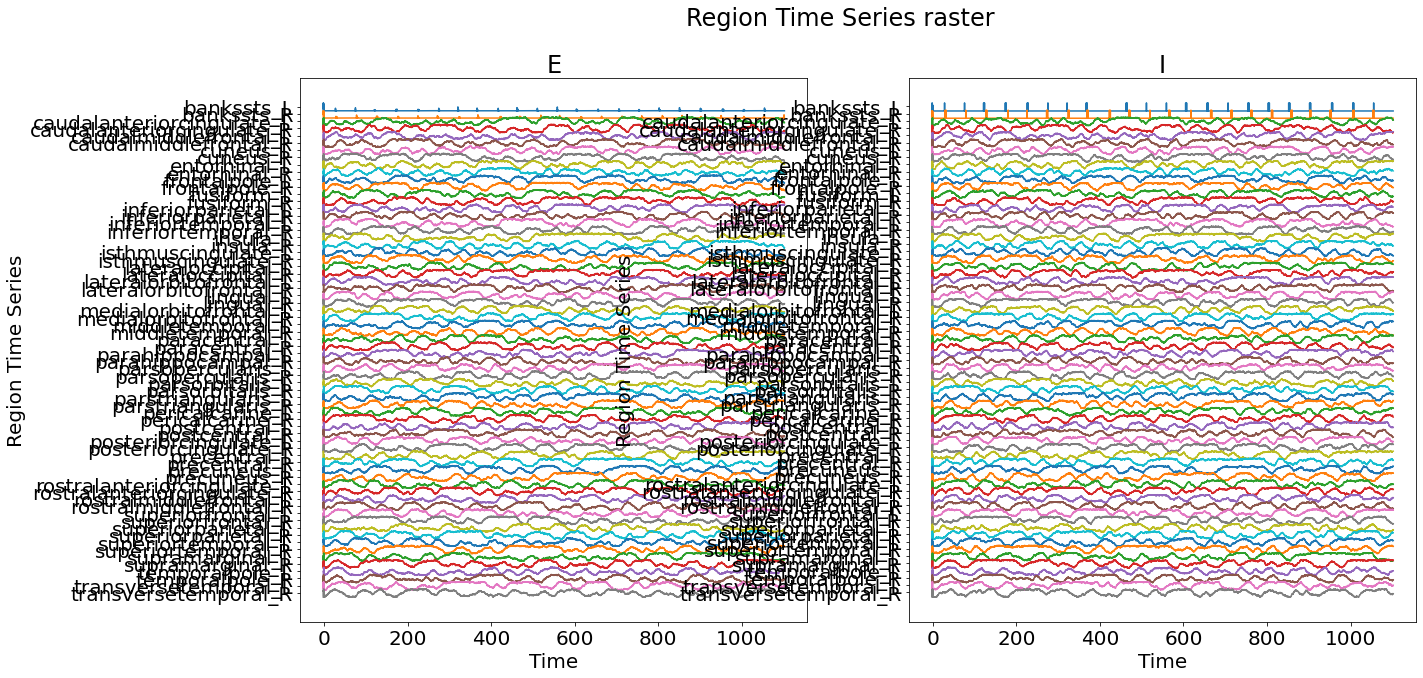

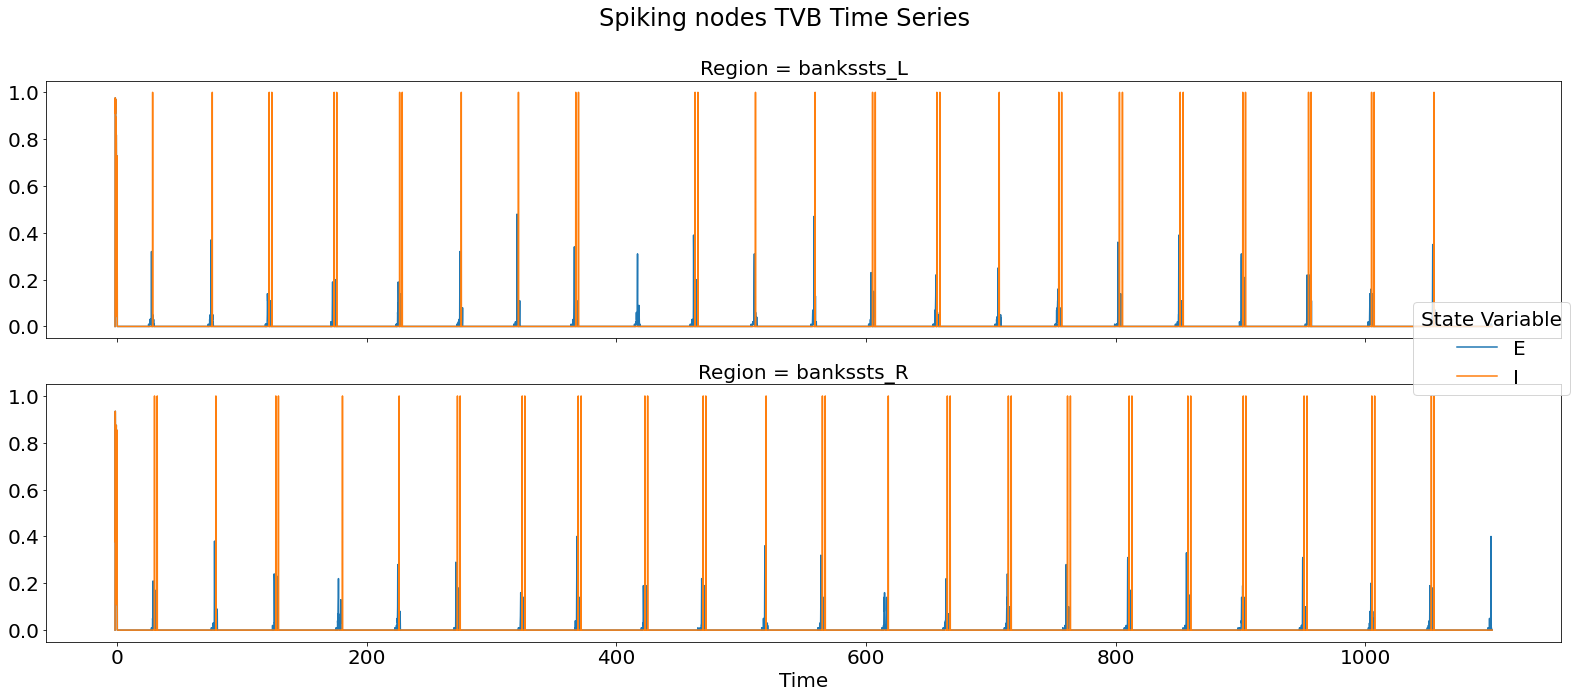


Stopping App NRPTVBApp...


In [38]:

from tvb_multiscale.core.nrp.final import *


spikeNet_app = final_spikeNet(spikeNet_app, plot=True)
tvb_to_spikeNet_app = final_transformer(tvb_to_spikeNet_app)
spikeNet_to_tvb_app = final_transformer(spikeNet_to_tvb_app)
tvb_app = final_tvb(tvb_app, plot=True)

del tvb_app, spikeNet_app, tvb_to_spikeNet_app, spikeNet_to_tvb_app


# References

1 Paula Sanz Leon, Stuart A. Knock, M. Marmaduke Woodman, Lia Domide, <br>
  Jochen Mersmann, Anthony R. McIntosh, Viktor Jirsa (2013) <br>
  The Virtual Brain: a simulator of primate brain network dynamics. <br>
  Frontiers in Neuroinformatics (7:10. doi: 10.3389/fninf.2013.00010) <br>
  https://www.thevirtualbrain.org/tvb/zwei <br>
  https://github.com/the-virtual-brain <br>

2 Ritter P, Schirner M, McIntosh AR, Jirsa VK. 2013.  <br>
  The Virtual Brain integrates computational modeling  <br>
  and multimodal neuroimaging. Brain Connectivity 3:121–145. <br>

3 Jordan, Jakob; Mørk, Håkon; Vennemo, Stine Brekke;   Terhorst, Dennis; Peyser, <br>
  Alexander; Ippen, Tammo; Deepu, Rajalekshmi;   Eppler, Jochen Martin; <br>
  van Meegen, Alexander;   Kunkel, Susanne; Sinha, Ankur; Fardet, Tanguy; Diaz, <br>
  Sandra; Morrison, Abigail; Schenck, Wolfram; Dahmen, David;   Pronold, Jari; <br>
  Stapmanns, Jonas;   Trensch, Guido; Spreizer, Sebastian;   Mitchell, Jessica; <br>
  Graber, Steffen; Senk, Johanna; Linssen, Charl; Hahne, Jan; Serenko, Alexey; <br>
  Naoumenko, Daniel; Thomson, Eric;   Kitayama, Itaru; Berns, Sebastian;   <br>
  Plesser, Hans Ekkehard <br>
  NEST is a simulator for spiking neural network models that focuses <br>
  on the dynamics, size and structure of neural systems rather than on <br>
  the exact morphology of individual neurons. <br>
  For further information, visit http://www.nest-simulator.org. <br>
  The release notes for this release are available at  <br>
  https://github.com/nest/nest-simulator/releases/tag/v2.18.0 <br>